In [3]:
#### Red Wall Replication

In [4]:
## What data do you need?

# constituency results + demographics
# sure, would be nice to have fine grained ward level stuff
# (didn't we extract a whole bunch of stuff ages ago at all sorts of different granularities?)
# but, if you're ultimately looking for *constituency level* output isn't that level data okay?

# you're building a demographic model

In [5]:
dataset_name = "W14_comb"
df_list = 'BES_Panel'
#            'BES_reduced_with_na'
#           ]#,"BESnumeric"]

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

Toggle code

In [6]:
BES_census_data = pd.read_stata( BES_small_data_files + "BES-2017-General-Election-results-file-v1.0.dta" )
print("BES_census_data", BES_census_data.shape )

BES_census_data (632, 308)


In [7]:
#### BUG! -> check if in latest release, if yes, then tell them! ###########
BES_census_data.loc[BES_census_data["Country"].isin(["Scotland"]),"c11Households"] =\
    BES_census_data.loc[BES_census_data["Country"].isin(["Scotland"]),"c11Households"]*100

In [8]:
# BES_census_data.loc[BES_census_data["Country"].isin(["Scotland"]),:].max()[]

In [9]:
BES_census_data.loc[BES_census_data["Country"].isin(["Scotland"]),:].select_dtypes('number').max().sort_values().tail(50)

LDVote17                       21023.0
SNPVote17                      21804.0
LDVote10                       22230.0
LabVote17                      26269.0
ConVote17                      28213.0
LabVote10                      29559.0
SNPVote15                      34831.0
TotalVote10                    52173.0
TotalVote17                    56552.0
TotalVote15                    61597.0
Electorate10                   81869.0
Electorate17                   86186.0
Electorate15                   86955.0
c11Population                 112273.0
PC17                               NaN
PCVote17                           NaN
PC1517                             NaN
PC15                               NaN
PCVote15                           NaN
BNPVote15                          NaN
PC1015                             NaN
PC10                               NaN
PCVote10                           NaN
c11EthnicityMixedCaribbean         NaN
c11EthnicityMixedAfrican           NaN
c11EthnicityMixedAsian   

In [10]:
pd

<module 'pandas' from 'E:\\Users\\Gamer\\anaconda3\\envs\\test_tensorflow_install\\lib\\site-packages\\pandas\\__init__.py'>

In [11]:
import geopandas as gpd
# set the filepath and load in a shapefile
fp = BES_small_data_files+"wpc.json"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
# map_df.head()
# now let's preview what our map looks like with no data in it
# map_df.plot();
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index("PCON13CD").join(BES_census_data.set_index("ONSConstID"))
merged.head()

PCON13CDO                  PCON13NM  \
PCON13CD                                        
E14000530       A01                 Aldershot   
E14000531       A02       Aldridge-Brownhills   
E14000532       A03  Altrincham and Sale West   
E14000533       A04              Amber Valley   
E14000534       A05   Arundel and South Downs   

                                                    geometry  pano  \
PCON13CD                                                             
E14000530  POLYGON ((-0.80477 51.24507, -0.80649 51.25344...     7   
E14000531  POLYGON ((-1.99086 52.63666, -1.98869 52.63912...     8   
E14000532  POLYGON ((-2.31400 53.35741, -2.31394 53.35834...     9   
E14000533  POLYGON ((-1.30799 53.00385, -1.30745 53.00364...    11   
E14000534  MULTIPOLYGON (((-0.52915 50.86555, -0.53169 50...    18   

                   ConstituencyName  Country         Region ConstituencyType  \
PCON13CD                                                                       
E14000530                 Aldershot  England     South East          Borough   
E14000531       Aldridge-Brownhills  England  West Midlands          Borough   
E14000532  Altrincham and Sale West  England     North West          Borough   
E14000533              Amber Valley  England  East Midlands           County   
E14000534   Arundel and South Downs  England     South East           County   

               Winner17      Con17  ...  c11HealthBad  c11HealthVeryBad  \
PCON13CD                            ...                                   
E14000530  Conservative  55.056180  ...      2.774196          0.801563   
E14000531  Conservative  65.408227  ...      4.878271          1.442045   
E14000532  Conservative  51.019132  ...      3.236326          0.907952   
E14000533  Conservative  56.547554  ...      5.089722          1.365452   
E14000534  Conservative  62.355616  ...      3.123361          0.892389   

           c11NoAdultsEmployed  c11NoAdultsEmployedChildren  \
PCON13CD                                                      
E14000530            23.736783                     3.122279   
E14000531            37.254111                     3.282656   
E14000532            30.050828                     2.381131   
E14000533            34.648021                     3.917629   
E14000534            34.622051                     1.697159   

           c11NoAdultsEmployedNoChildren  c11DeprivedNone  c11Deprived1  \
PCON13CD                                                                  
E14000530                      20.614504        47.943774     32.837418   
E14000531                      33.971455        39.975178     33.062364   
E14000532                      27.669696        54.415484     29.019254   
E14000533                      30.730392        40.566761     31.407122   
E14000534                      32.924892        51.468464     32.722677   

           c11Deprived2  c11Deprived3  c11Deprived4  
PCON13CD                                             
E14000530     15.180993      3.624829      0.412987  
E14000531     22.137760      4.520633      0.304065  
E14000532     13.370390      3.014597      0.180275  
E14000533     22.501256      5.186497      0.338365  
E14000534     13.490611      2.154550      0.163698  

[5 rows x 310 columns]

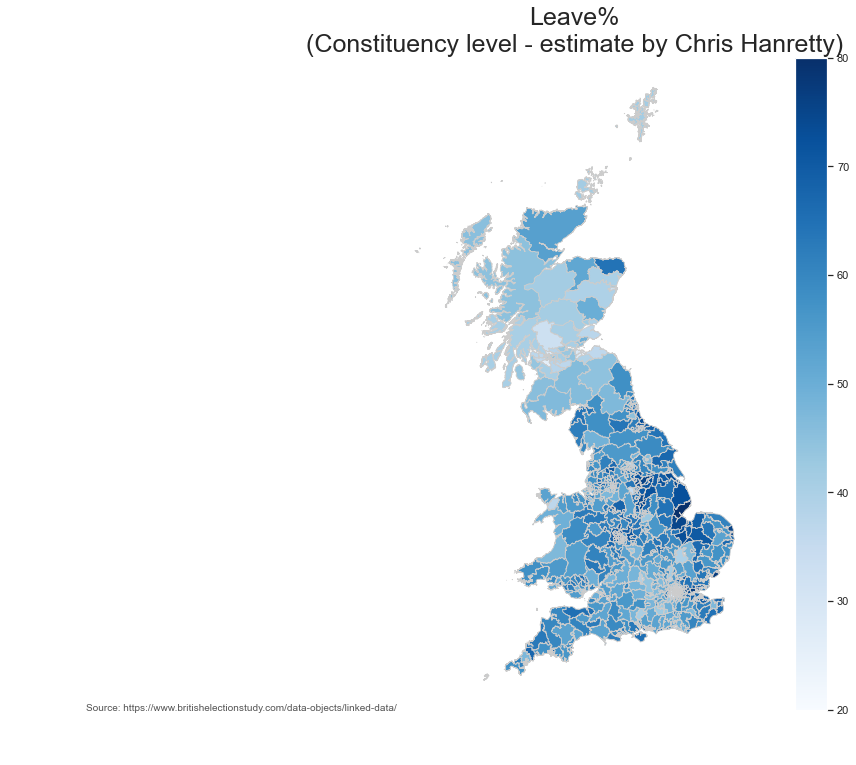

In [12]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'leaveHanretty'

# set the range for the choropleth
vmin, vmax = np.floor(BES_census_data["leaveHanretty"].min()/10)*10, np.ceil(BES_census_data["leaveHanretty"].max()/10)*10

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(16, 12))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Leave%\n(Constituency level - estimate by Chris Hanretty)', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: https://www.britishelectionstudy.com/data-objects/linked-data/',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

Treatment = "Chloropleth"
output_subfolder = create_subdir(BES_output_folder,Treatment)
fname = output_subfolder +Treatment + ".png"
# this will save the figure as a high-res png. you can also save as svg
plt.savefig( fname, bbox_inches='tight', dpi=300 )


# fig.savefig('testmap.png', dpi=300)

In [13]:
# BES_census_data.columns[0:90]

In [14]:
## so what's the target of this regression? Con%? With/without Non-Voting?

# note - we're relying on UK census variables which - as far as I recall - only get updated ~decade

# 2015/2017/2019 has nice premade BES files

# https://www.jstor.org/stable/2344955
# - interesting, no (directly aggregated) constituency level data until 1966

# do it for 2017
# compare to James Kanagoosooriam

# https://journals.sagepub.com/doi/10.1177/20419058211045127
# https://twitter.com/jameskanag/status/1161639307536457730?lang=en
# https://en.wikipedia.org/wiki/Red_wall_(British_politics)

In [15]:
BES_census_data.dtypes.value_counts()

float64     250
object       18
category     14
int32        10
category      7
int16         3
category      2
category      1
category      1
category      1
category      1
dtype: int64

In [16]:
drop_cols = ['Winner17', 'Winner15', 'Winner10','pano',#category
            'ConVote17', 'TotalVote17', 'Electorate17', 'ConVote15', 'TotalVote15',
       'Electorate15', 'ConVote10', 'TotalVote10', 'Electorate10', #int
              'Lab17', 'LD17', 'SNP17', 'PC17', 'UKIP17', 'Green17',
             # 'Con17',
       'Other17', 'Majority17', 'Turnout17', 'LabVote17', 'LDVote17',
       'SNPVote17', 'PCVote17', 'UKIPVote17', 'GreenVote17', 'Con1517',
       'Lab1517', 'LD1517', 'SNP1517', 'PC1517', 'UKIP1517', 'Green1517',
       'Con15', 'Lab15', 'LD15', 'SNP15', 'PC15', 'UKIP15', 'Green15',
       'Other15', 'Majority15', 'Turnout15', 'LabVote15', 'LDVote15',
       'SNPVote15', 'PCVote15', 'UKIPVote15', 'GreenVote15', 'BNPVote15',
       'Con1015', 'Lab1015', 'LD1015', 'SNP1015', 'PC1015', 'UKIP1015',
       'Green1015', 'Con10', 'Lab10', 'LD10', 'SNP10', 'PC10', 'UKIP10',
       'Green10', 'BNP10', 'Majority10', 'Turn10', 'LabVote10', 'LDVote10',
       'SNPVote10', 'PCVote10', 'UKIPVote10', 'GreenVote10', 'BNPVote10',## float
    'ONSConstID', 'ConstituencyName', 'SeatChange1517', 'SeatChange1015',
       'ConPPC17', 'LabPPC17', 'LDPPC17', 'SNPPPC17', 'PCPPC17', 'UKIPPPC17',
       'GreenPPC17', 'ConPPC15', 'LabPPC15', 'LDPPC15', 'SNPPPC15', 'PCPPC15',
       'UKIPPPC15', 'GreenPPC15'     # object
            ]

# 'c11Population'

MSE: 21.69, MAE: 3.72, EV: 0.91, R2: 0.91


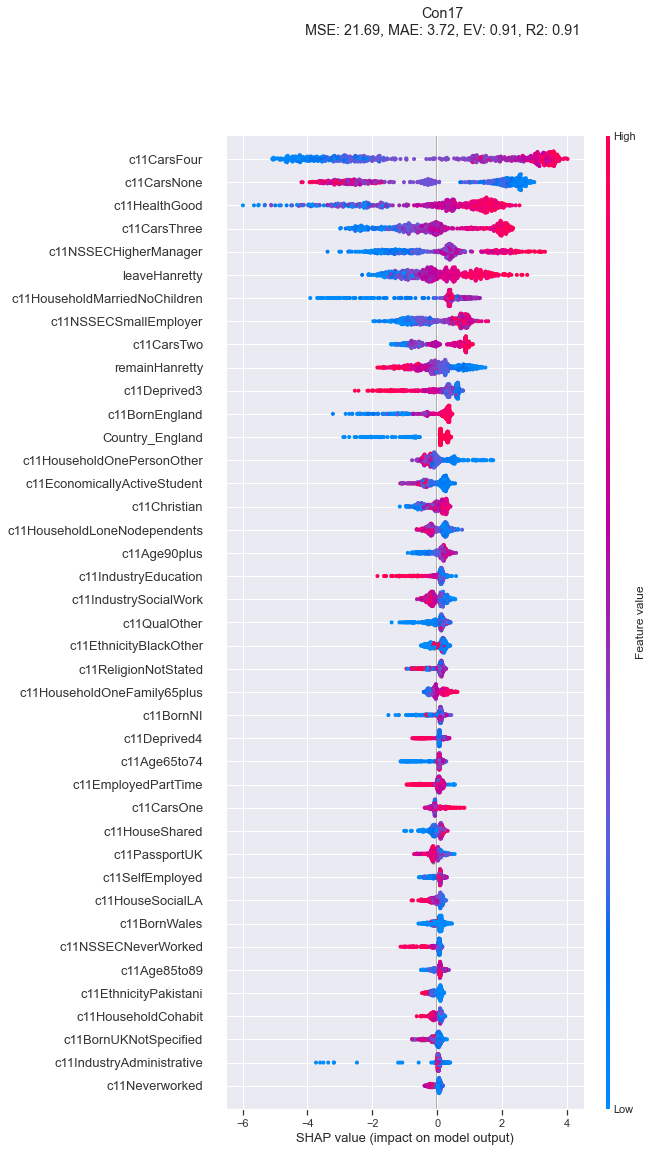

<Figure size 1152x720 with 0 Axes>

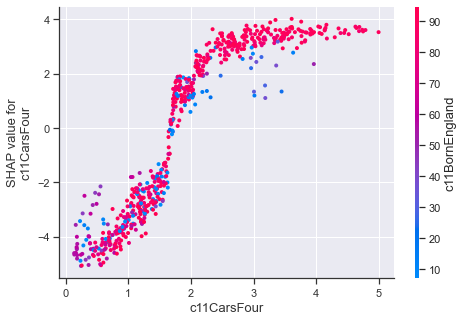

<Figure size 1152x720 with 0 Axes>

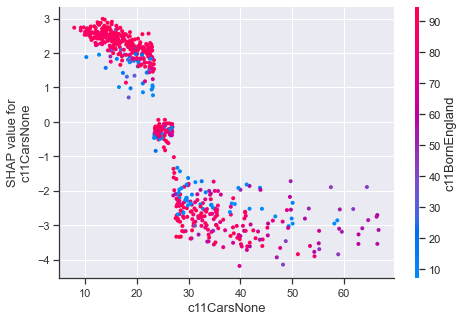

<Figure size 1152x720 with 0 Axes>

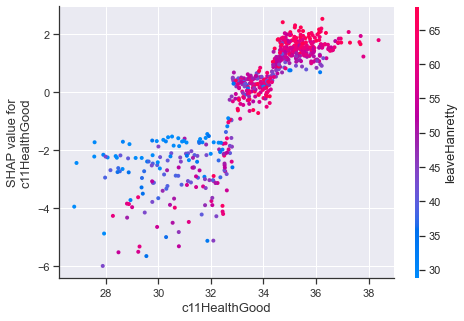

<Figure size 1152x720 with 0 Axes>

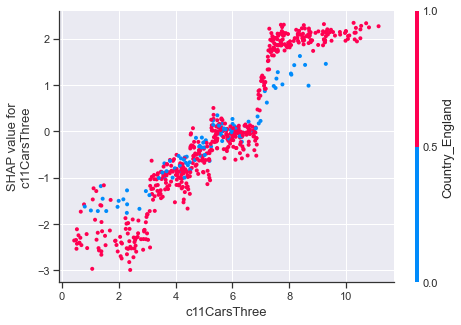

<Figure size 1152x720 with 0 Axes>

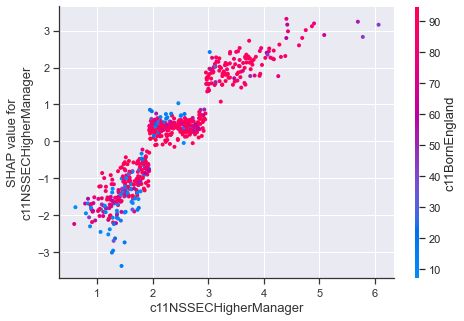

<Figure size 1152x720 with 0 Axes>

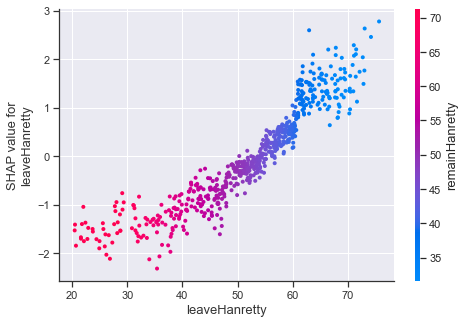

<Figure size 1152x720 with 0 Axes>

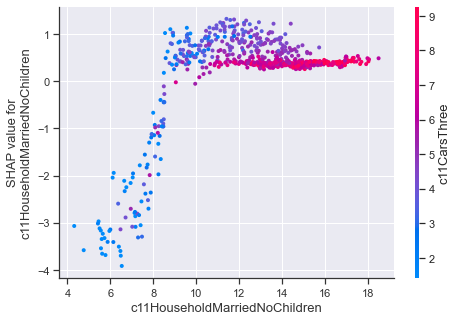

<Figure size 1152x720 with 0 Axes>

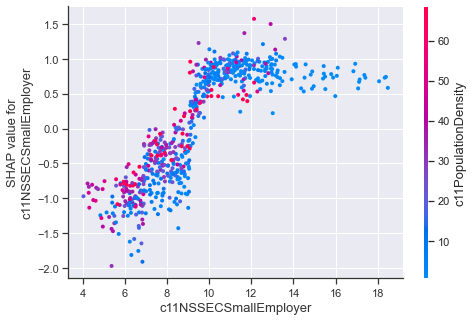

<Figure size 1152x720 with 0 Axes>

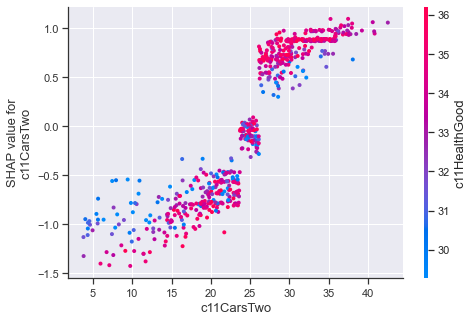

<Figure size 1152x720 with 0 Axes>

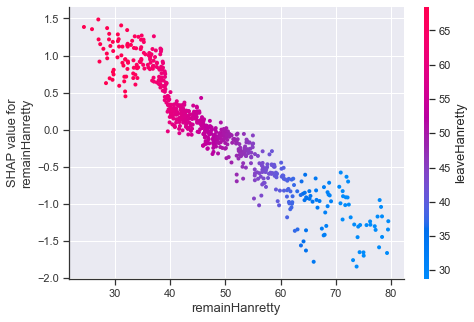

<Figure size 1152x720 with 0 Axes>

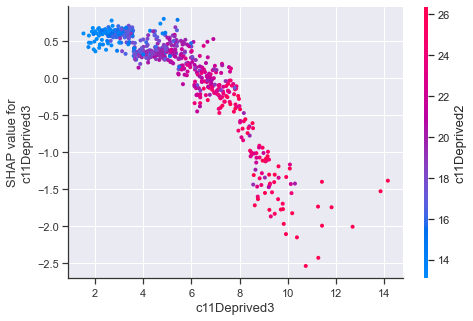

<Figure size 1152x720 with 0 Axes>

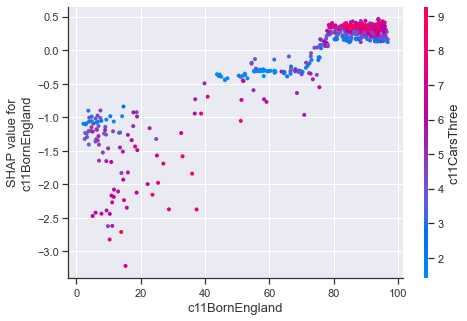

<Figure size 1152x720 with 0 Axes>

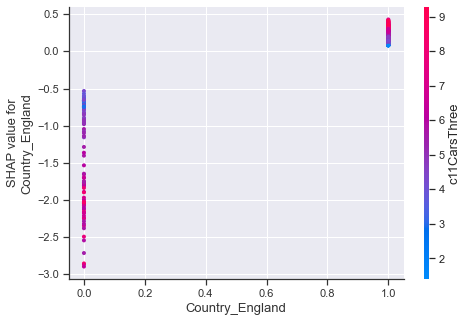

<Figure size 1152x720 with 0 Axes>

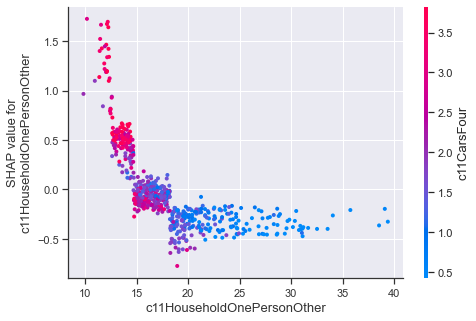

<Figure size 1152x720 with 0 Axes>

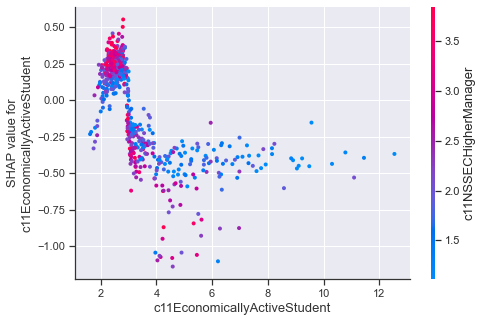

<Figure size 1152x720 with 0 Axes>

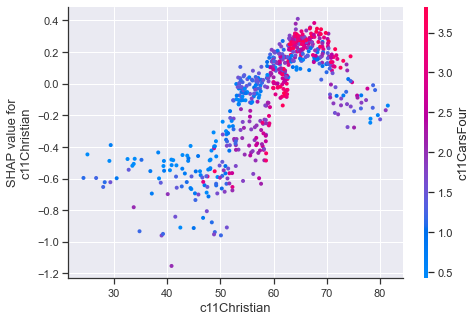

<Figure size 1152x720 with 0 Axes>

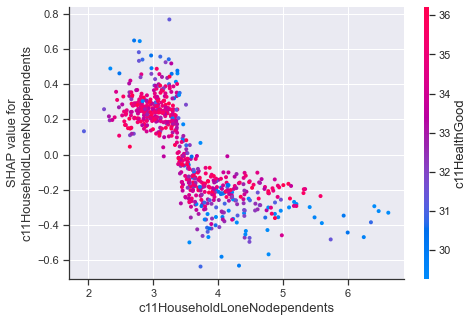

<Figure size 1152x720 with 0 Axes>

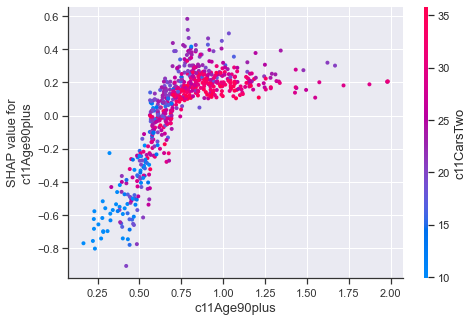

<Figure size 1152x720 with 0 Axes>

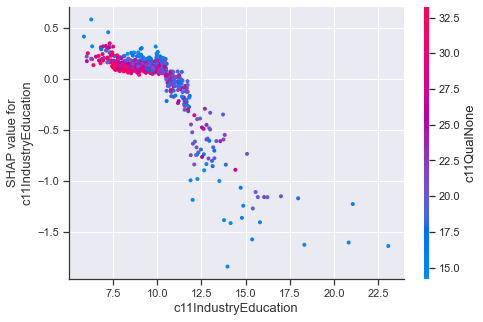

<Figure size 1152x720 with 0 Axes>

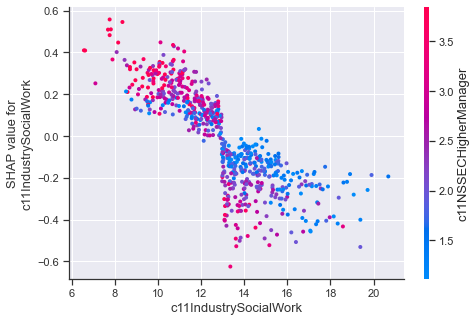

<Figure size 1152x720 with 0 Axes>

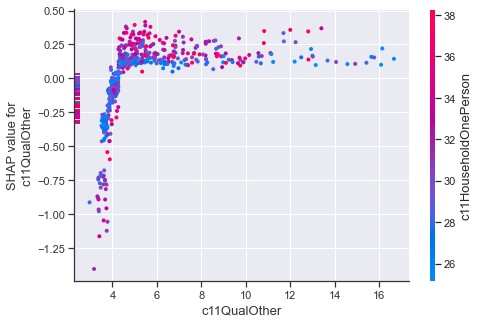

<Figure size 1152x720 with 0 Axes>

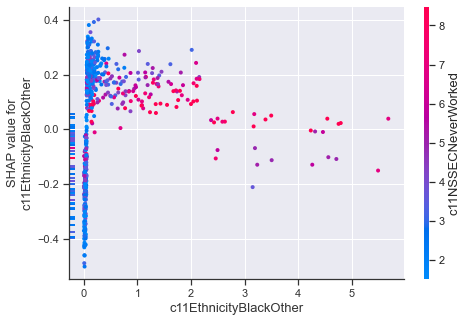

<Figure size 1152x720 with 0 Axes>

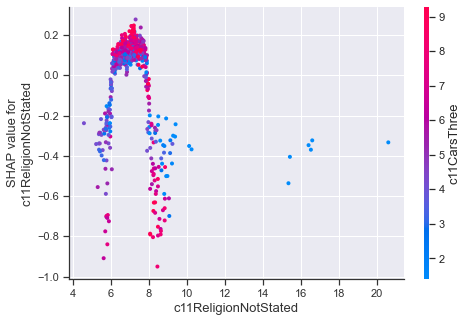

<Figure size 1152x720 with 0 Axes>

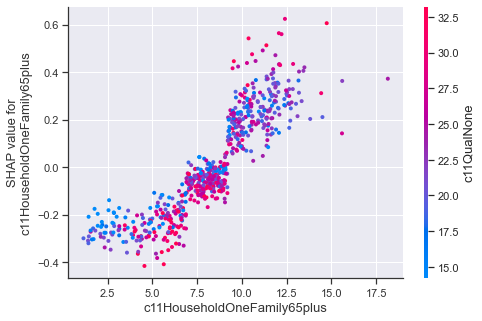

<Figure size 1152x720 with 0 Axes>

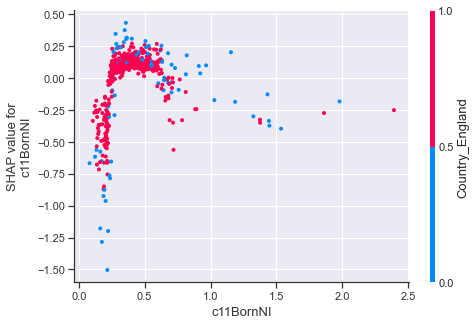

<Figure size 1152x720 with 0 Axes>

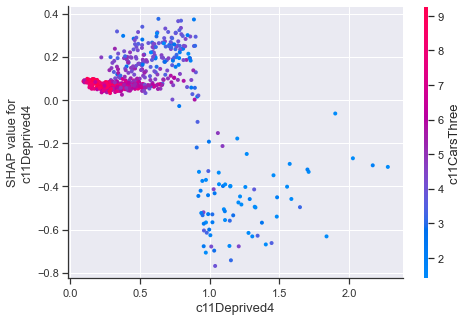

<Figure size 1152x720 with 0 Axes>

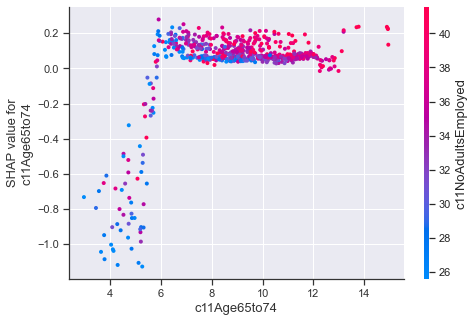

<Figure size 1152x720 with 0 Axes>

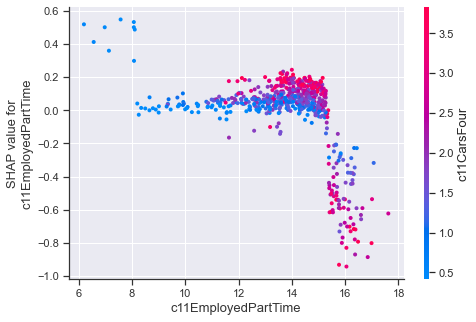

<Figure size 1152x720 with 0 Axes>

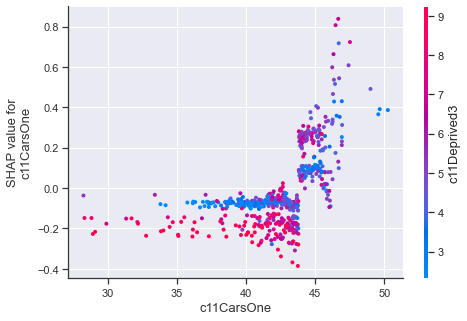

<Figure size 1152x720 with 0 Axes>

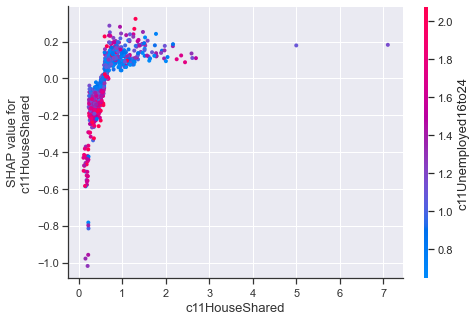

<Figure size 1152x720 with 0 Axes>

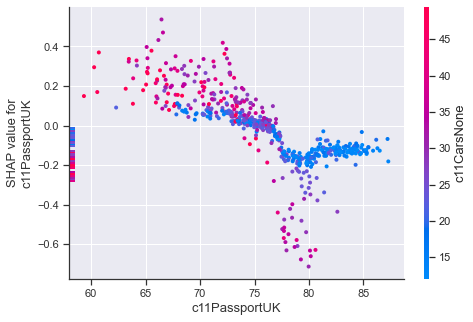

<Figure size 1152x720 with 0 Axes>

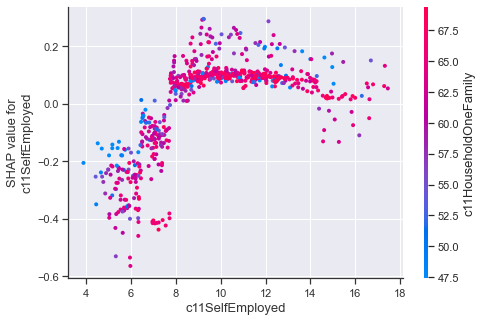

<Figure size 1152x720 with 0 Axes>

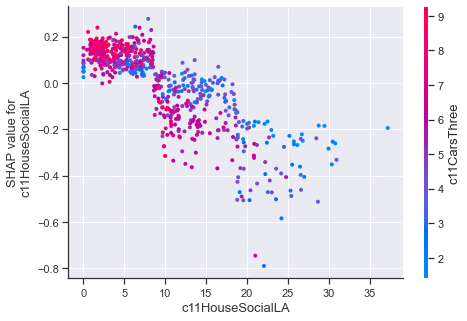

<Figure size 1152x720 with 0 Axes>

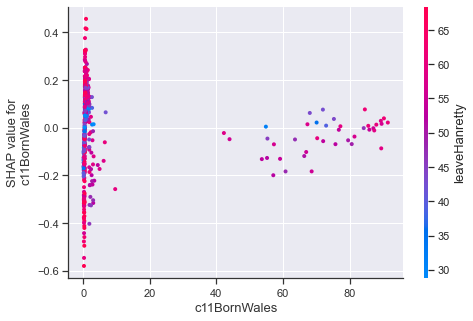

<Figure size 1152x720 with 0 Axes>

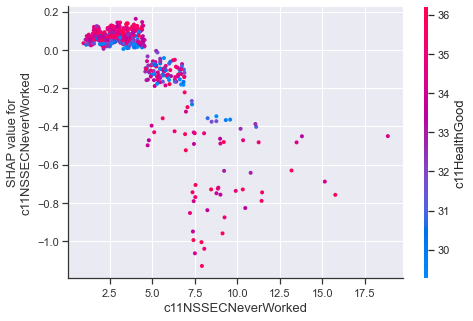

<Figure size 1152x720 with 0 Axes>

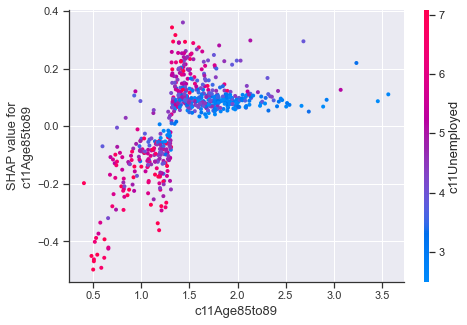

<Figure size 1152x720 with 0 Axes>

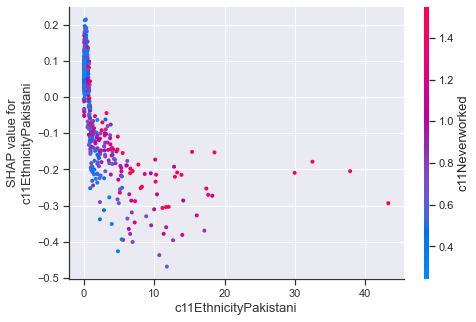

<Figure size 1152x720 with 0 Axes>

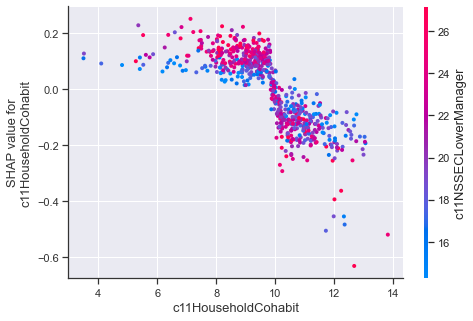

<Figure size 1152x720 with 0 Axes>

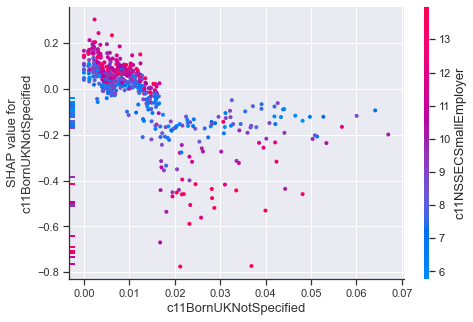

<Figure size 1152x720 with 0 Axes>

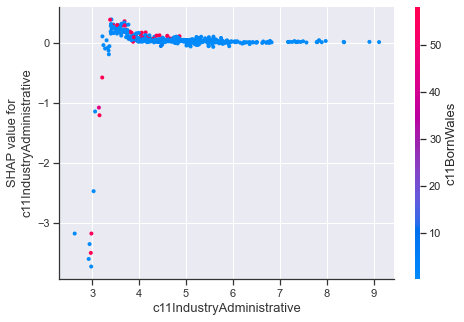

<Figure size 1152x720 with 0 Axes>

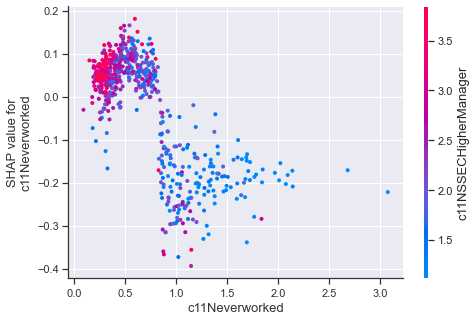

In [17]:
df_simp = pd.get_dummies(BES_census_data.drop(drop_cols,axis=1))

var_stub = "Con17"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df_simp[var_stub].notnull()
wt_cols = []
min_features = 30
colname = "Con17"
dependence_plots = True

alg = get_xgboost_alg(classification_problem=False)
title = "Con17"

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_simp[mask].drop(wt_cols,axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=None,
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

MSE: 21.90, MAE: 3.73, EV: 0.90, R2: 0.90


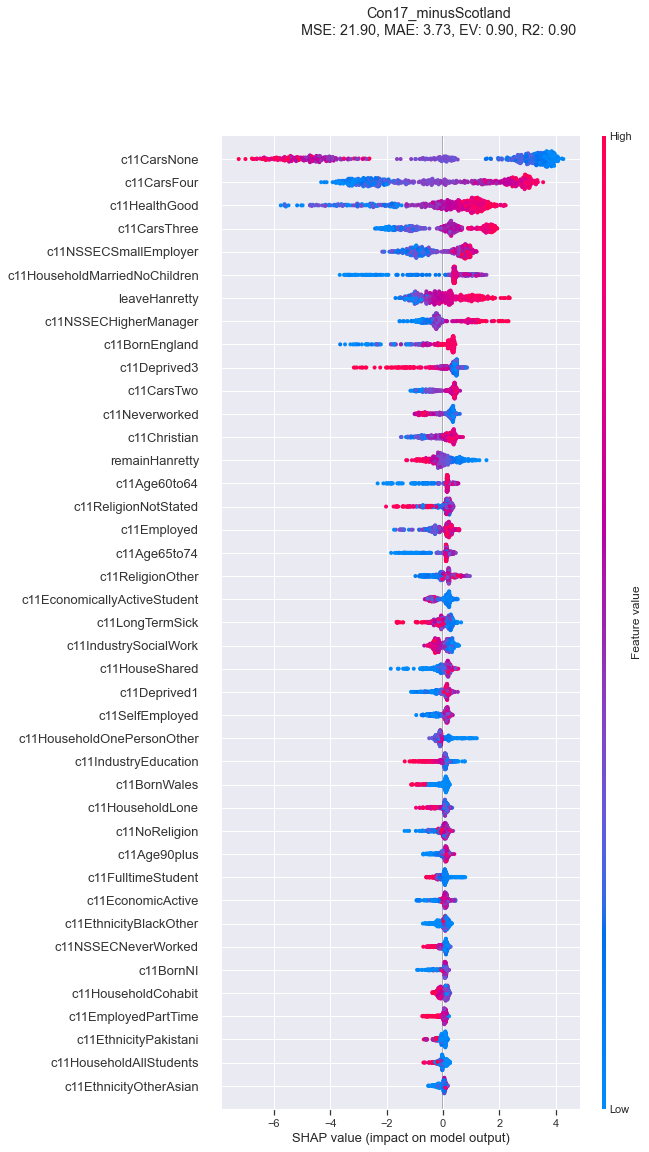

<Figure size 1152x720 with 0 Axes>

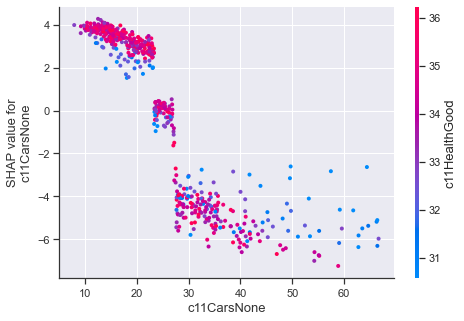

<Figure size 1152x720 with 0 Axes>

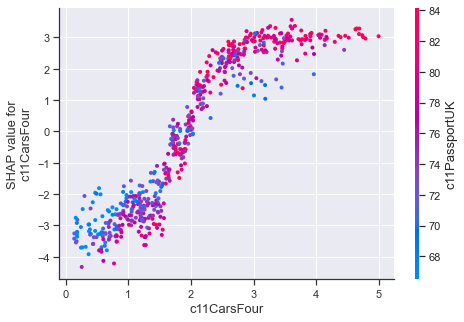

<Figure size 1152x720 with 0 Axes>

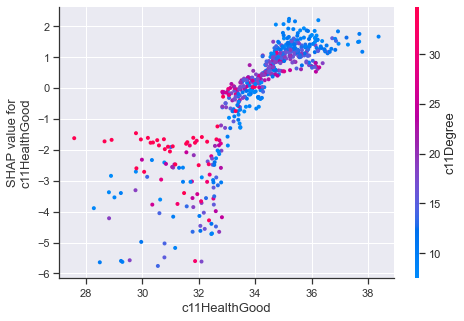

<Figure size 1152x720 with 0 Axes>

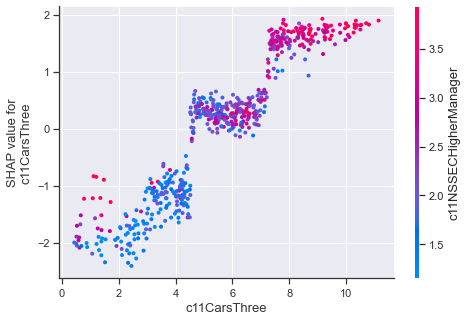

<Figure size 1152x720 with 0 Axes>

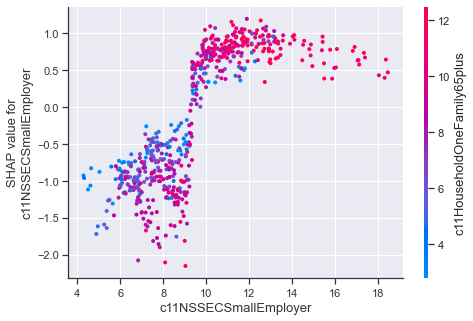

<Figure size 1152x720 with 0 Axes>

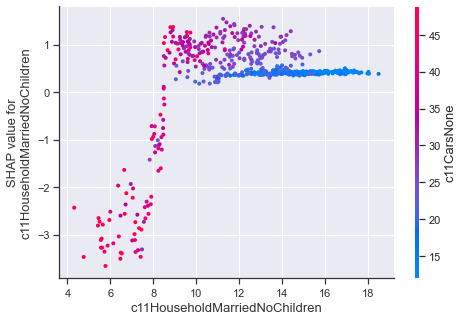

<Figure size 1152x720 with 0 Axes>

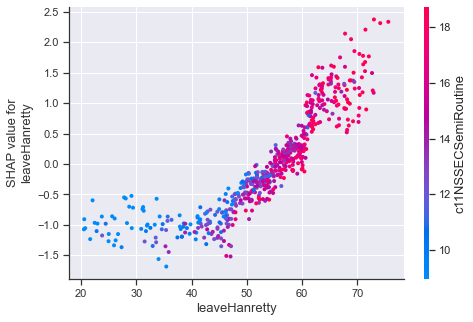

<Figure size 1152x720 with 0 Axes>

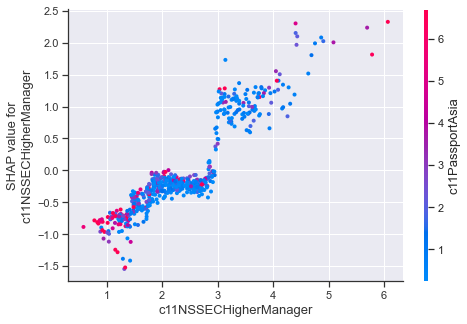

<Figure size 1152x720 with 0 Axes>

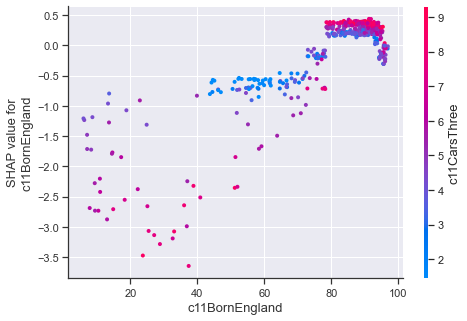

<Figure size 1152x720 with 0 Axes>

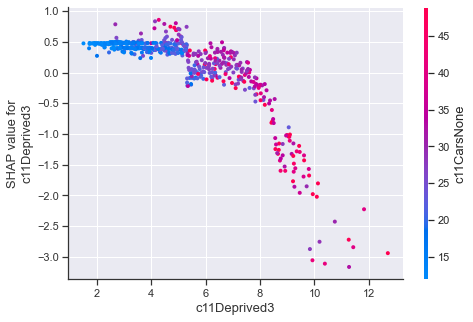

<Figure size 1152x720 with 0 Axes>

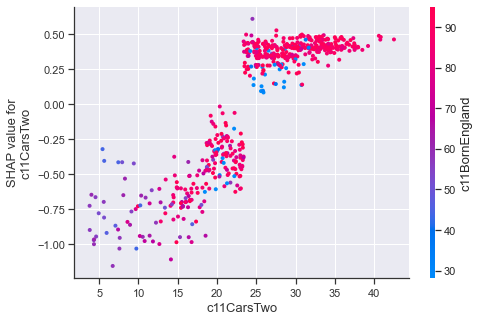

<Figure size 1152x720 with 0 Axes>

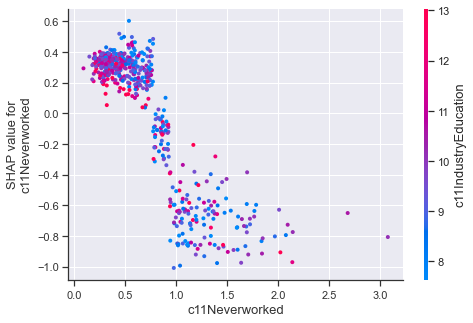

<Figure size 1152x720 with 0 Axes>

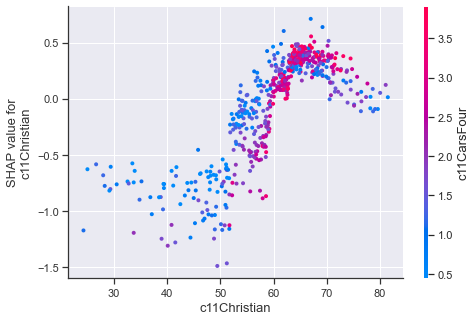

<Figure size 1152x720 with 0 Axes>

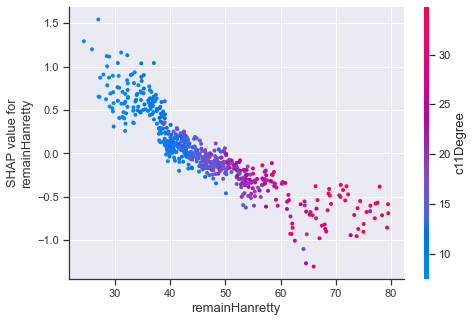

<Figure size 1152x720 with 0 Axes>

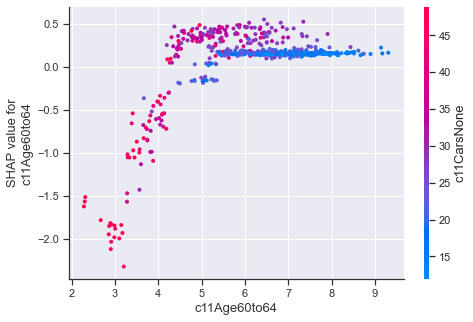

<Figure size 1152x720 with 0 Axes>

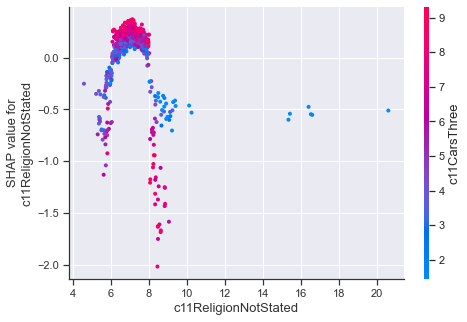

<Figure size 1152x720 with 0 Axes>

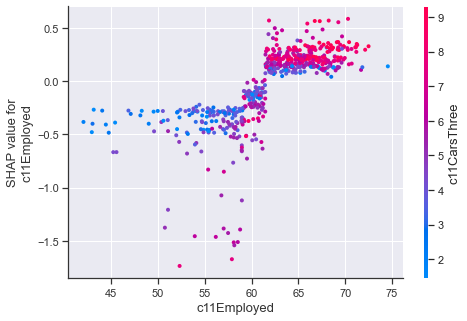

<Figure size 1152x720 with 0 Axes>

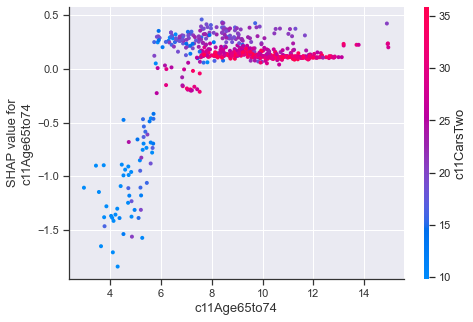

<Figure size 1152x720 with 0 Axes>

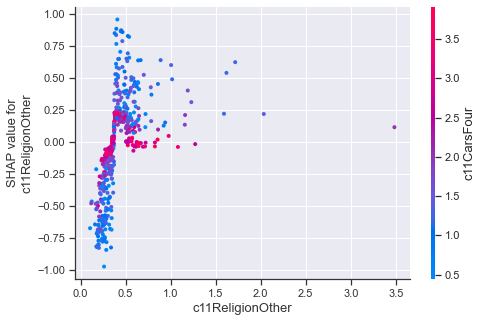

<Figure size 1152x720 with 0 Axes>

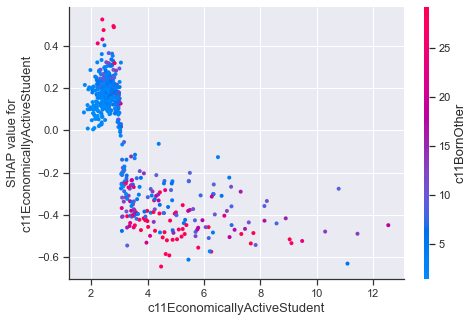

<Figure size 1152x720 with 0 Axes>

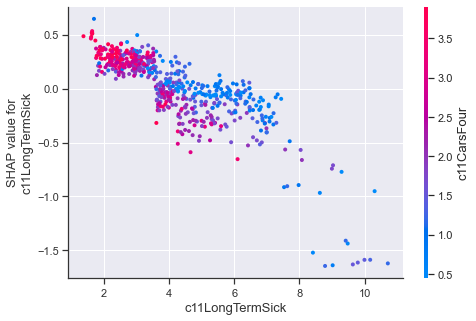

<Figure size 1152x720 with 0 Axes>

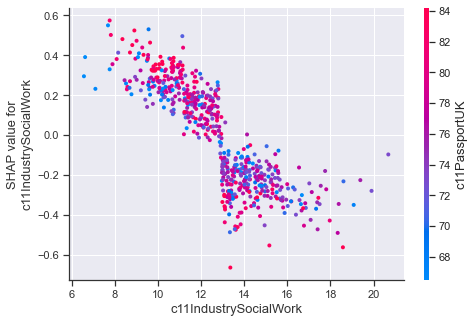

<Figure size 1152x720 with 0 Axes>

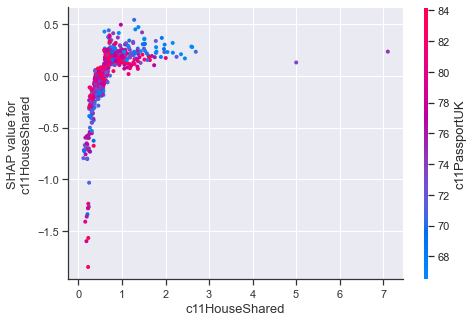

<Figure size 1152x720 with 0 Axes>

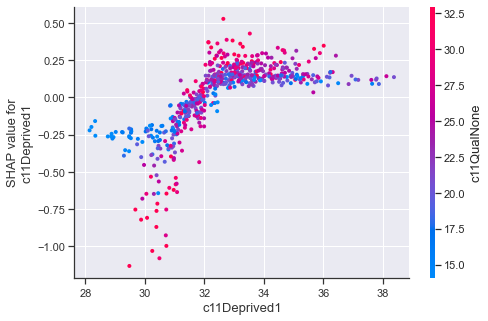

<Figure size 1152x720 with 0 Axes>

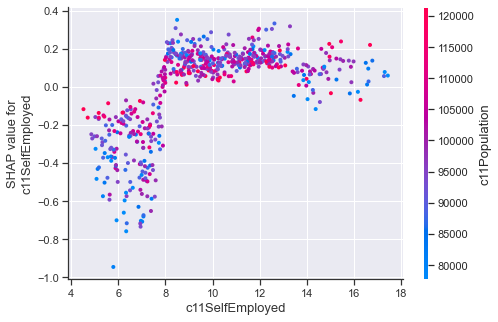

<Figure size 1152x720 with 0 Axes>

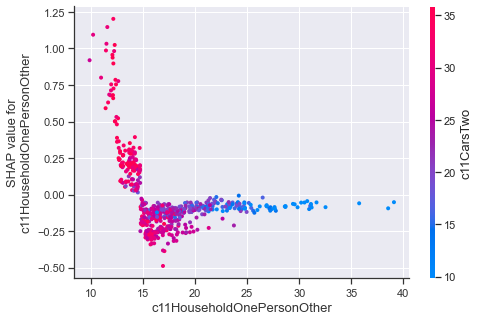

<Figure size 1152x720 with 0 Axes>

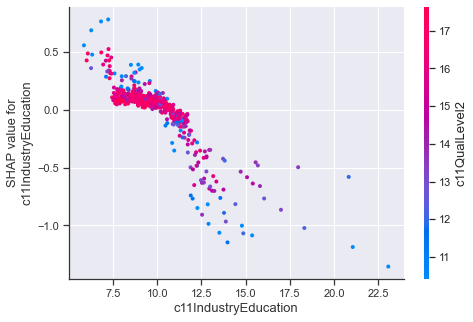

<Figure size 1152x720 with 0 Axes>

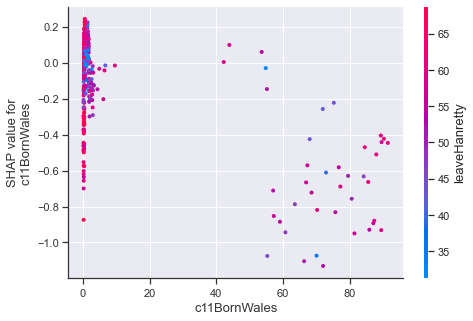

<Figure size 1152x720 with 0 Axes>

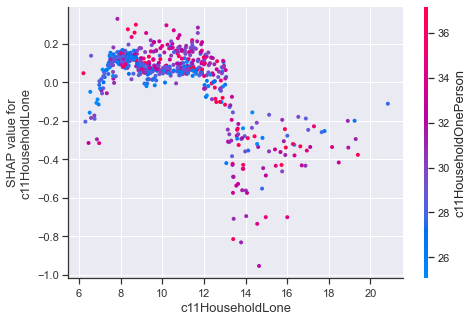

<Figure size 1152x720 with 0 Axes>

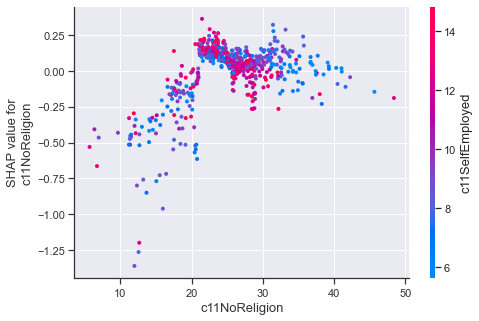

<Figure size 1152x720 with 0 Axes>

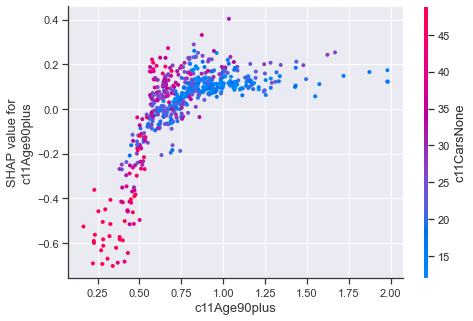

<Figure size 1152x720 with 0 Axes>

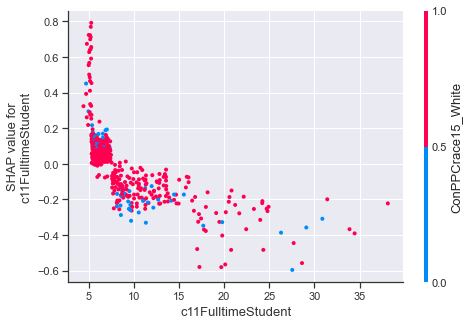

<Figure size 1152x720 with 0 Axes>

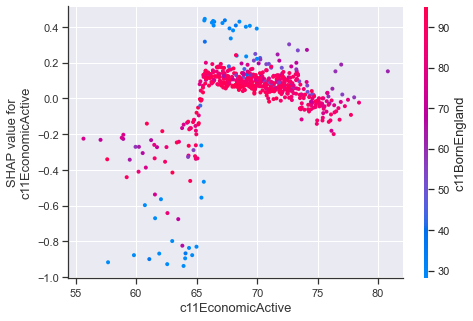

<Figure size 1152x720 with 0 Axes>

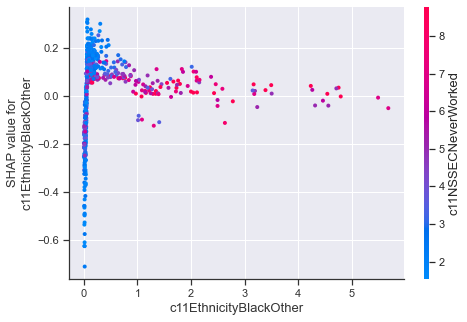

<Figure size 1152x720 with 0 Axes>

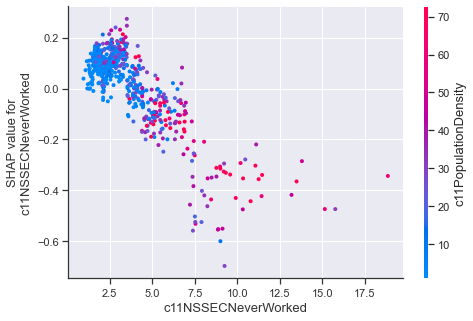

<Figure size 1152x720 with 0 Axes>

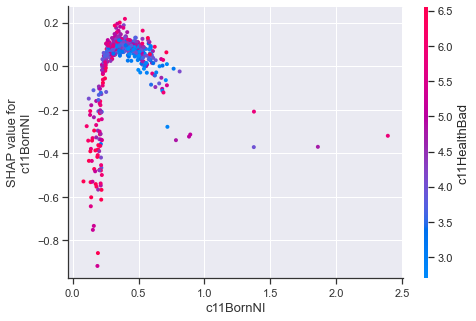

<Figure size 1152x720 with 0 Axes>

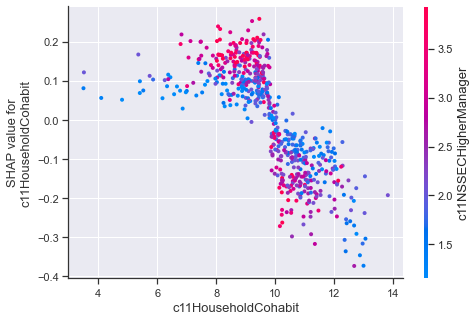

<Figure size 1152x720 with 0 Axes>

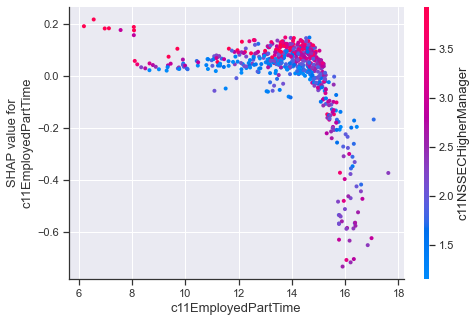

<Figure size 1152x720 with 0 Axes>

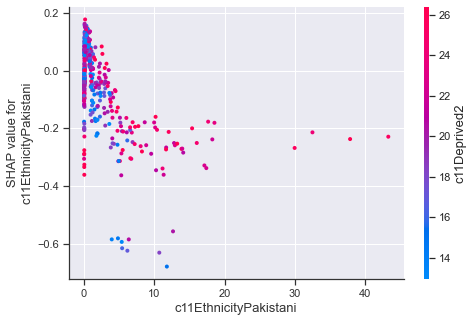

<Figure size 1152x720 with 0 Axes>

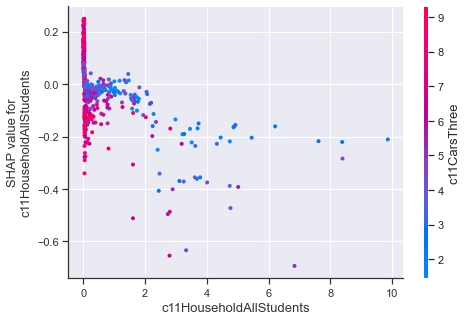

<Figure size 1152x720 with 0 Axes>

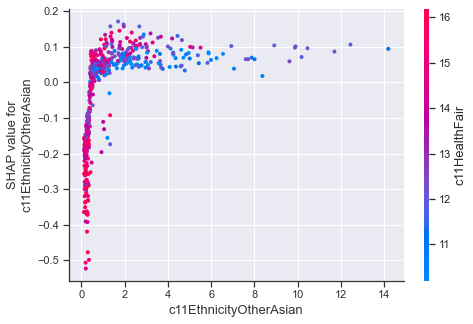

In [18]:
df_simp = pd.get_dummies(BES_census_data.drop(drop_cols,axis=1))

var_stub = "Con17"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df_simp[var_stub].notnull() & (BES_census_data["Country"]!="Scotland")
wt_cols = []
min_features = 30
colname = "Con17"
dependence_plots = True

alg = get_xgboost_alg(classification_problem=False)
title = "Con17_minusScotland"

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_simp[mask].drop(wt_cols,axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=None,
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

MSE: 23.21, MAE: 3.92, EV: 0.90, R2: 0.90


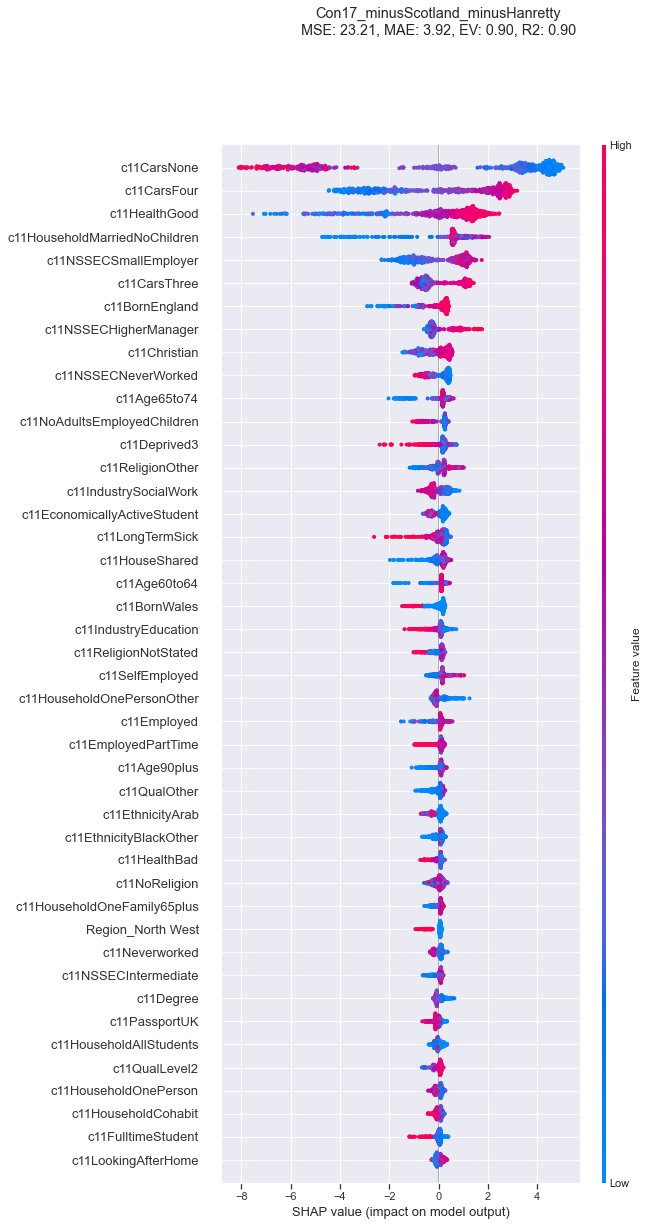

<Figure size 1152x720 with 0 Axes>

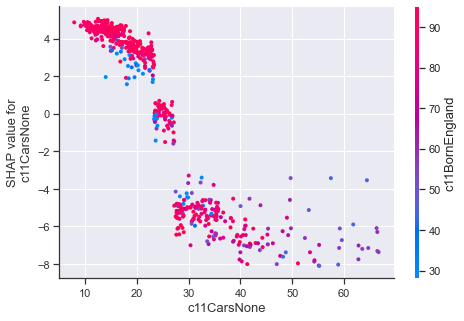

<Figure size 1152x720 with 0 Axes>

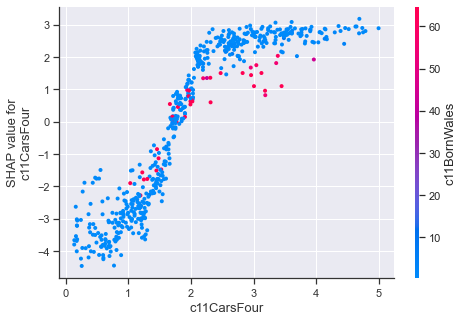

<Figure size 1152x720 with 0 Axes>

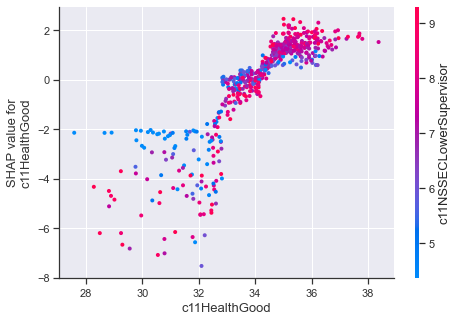

<Figure size 1152x720 with 0 Axes>

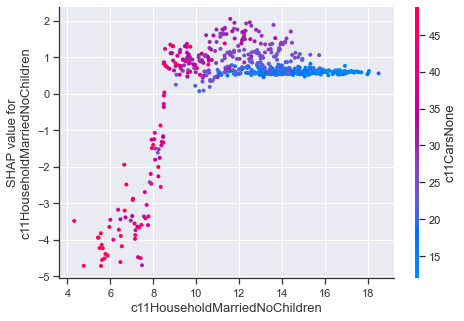

<Figure size 1152x720 with 0 Axes>

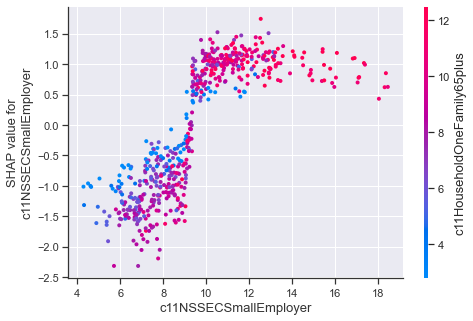

<Figure size 1152x720 with 0 Axes>

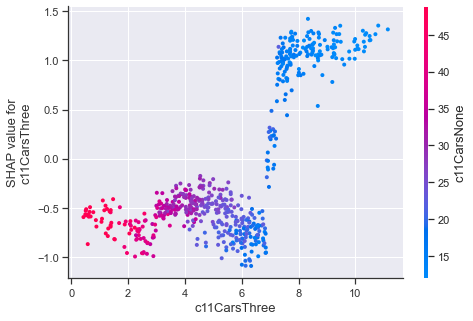

<Figure size 1152x720 with 0 Axes>

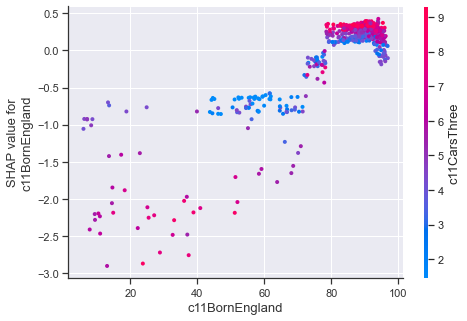

<Figure size 1152x720 with 0 Axes>

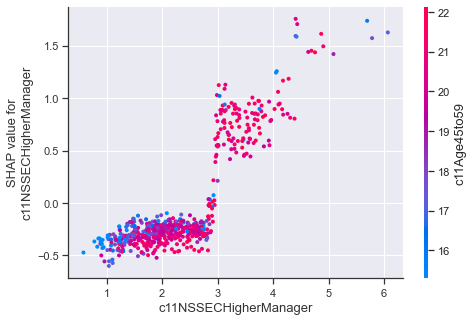

<Figure size 1152x720 with 0 Axes>

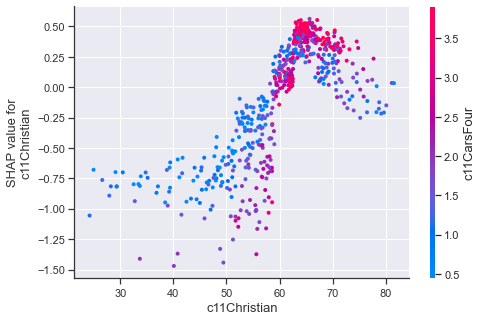

<Figure size 1152x720 with 0 Axes>

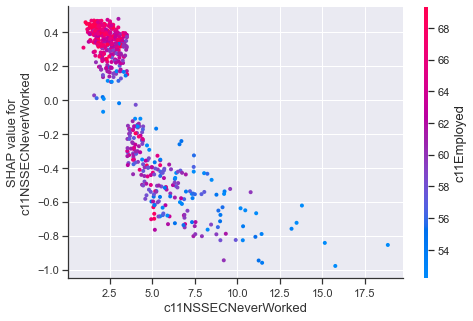

<Figure size 1152x720 with 0 Axes>

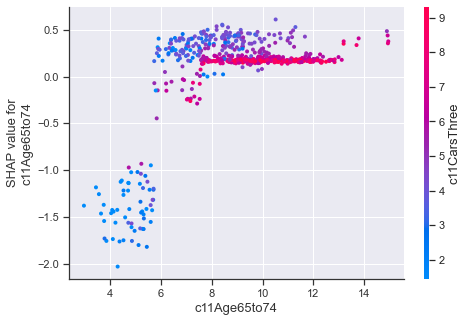

<Figure size 1152x720 with 0 Axes>

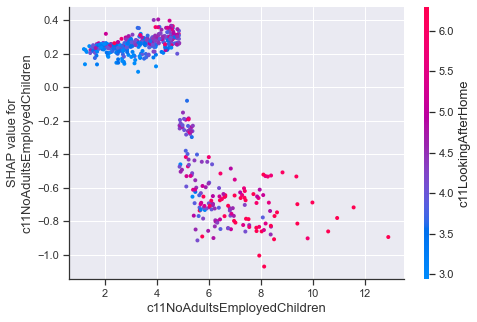

<Figure size 1152x720 with 0 Axes>

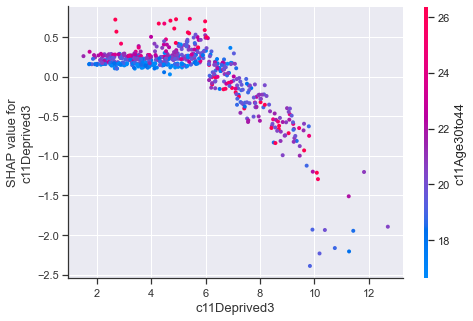

<Figure size 1152x720 with 0 Axes>

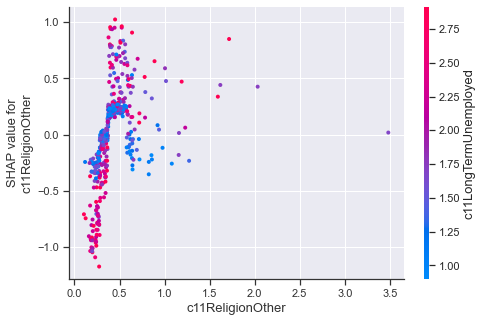

<Figure size 1152x720 with 0 Axes>

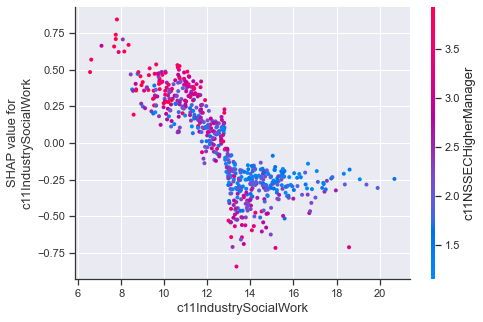

<Figure size 1152x720 with 0 Axes>

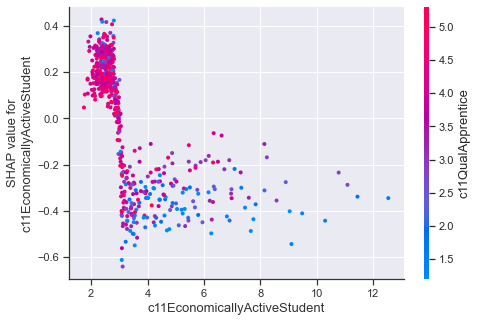

<Figure size 1152x720 with 0 Axes>

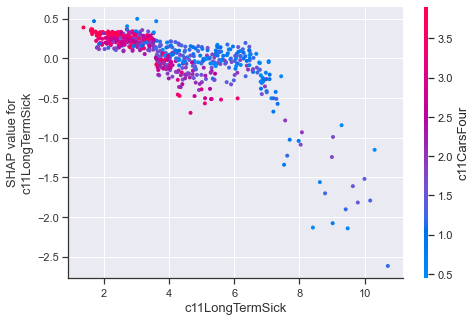

<Figure size 1152x720 with 0 Axes>

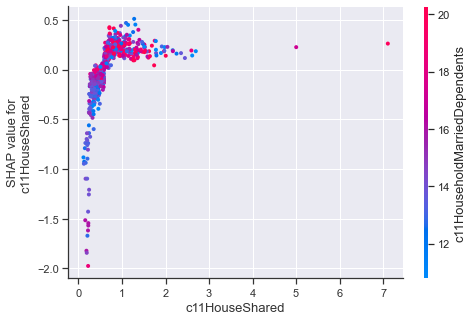

<Figure size 1152x720 with 0 Axes>

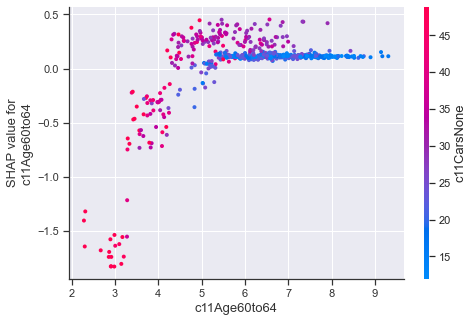

<Figure size 1152x720 with 0 Axes>

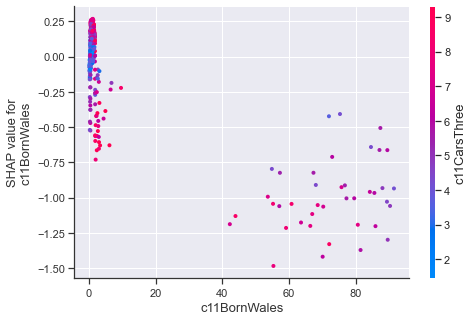

<Figure size 1152x720 with 0 Axes>

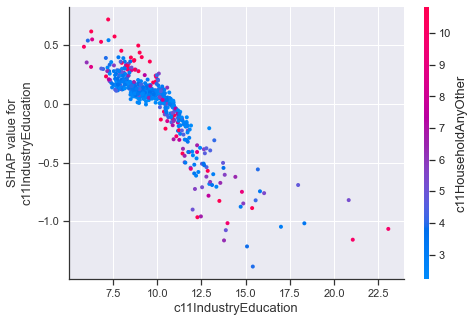

<Figure size 1152x720 with 0 Axes>

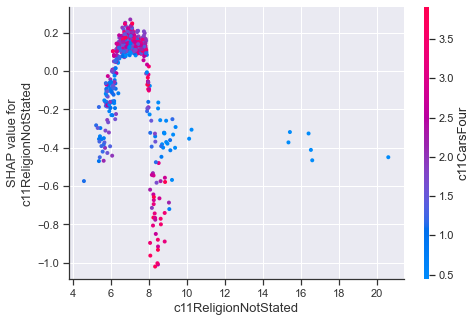

<Figure size 1152x720 with 0 Axes>

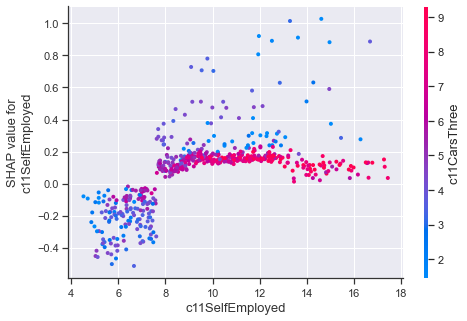

<Figure size 1152x720 with 0 Axes>

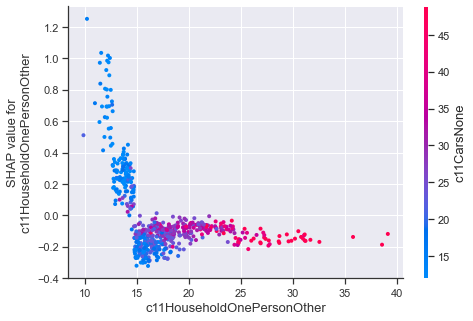

<Figure size 1152x720 with 0 Axes>

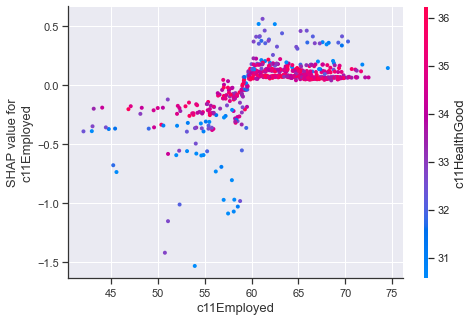

<Figure size 1152x720 with 0 Axes>

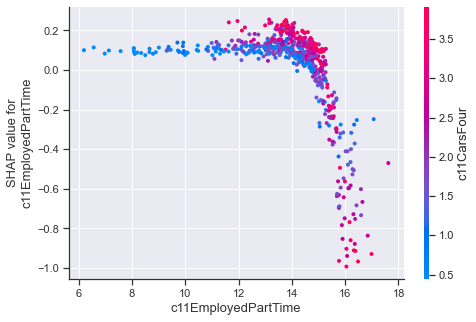

<Figure size 1152x720 with 0 Axes>

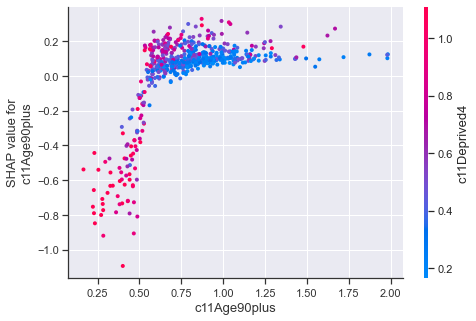

<Figure size 1152x720 with 0 Axes>

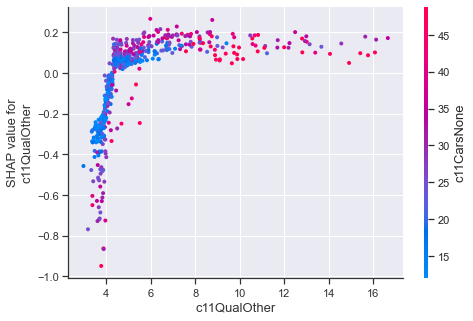

<Figure size 1152x720 with 0 Axes>

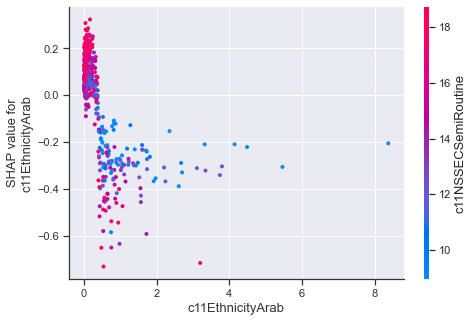

<Figure size 1152x720 with 0 Axes>

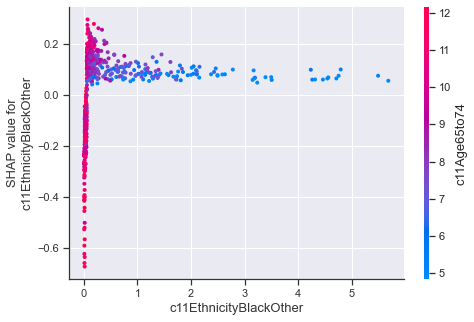

<Figure size 1152x720 with 0 Axes>

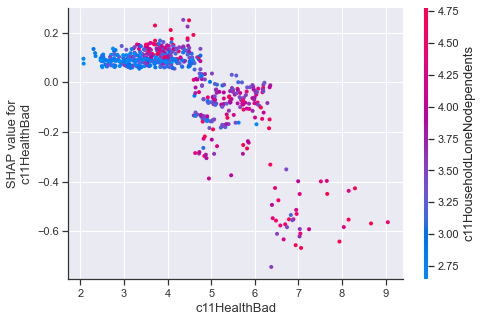

<Figure size 1152x720 with 0 Axes>

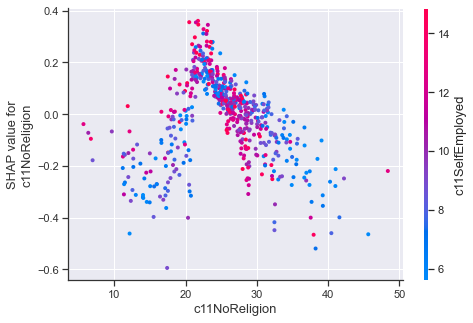

<Figure size 1152x720 with 0 Axes>

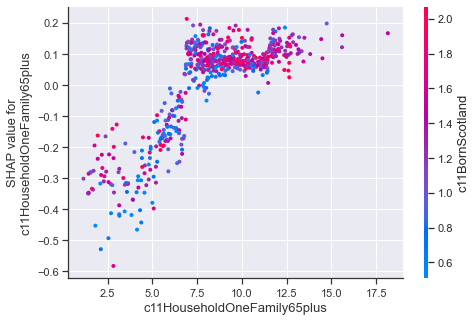

<Figure size 1152x720 with 0 Axes>

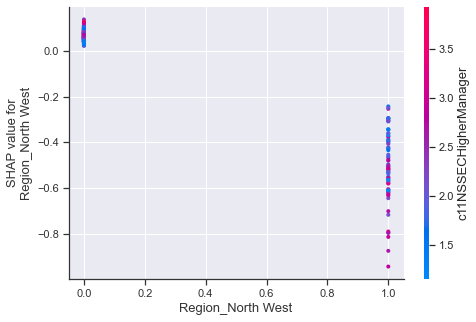

<Figure size 1152x720 with 0 Axes>

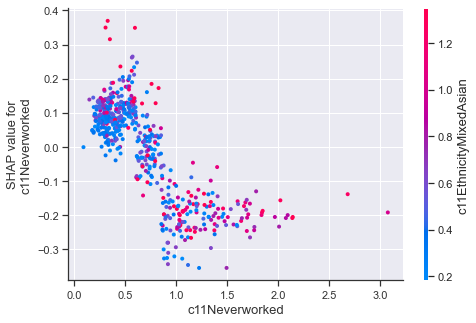

<Figure size 1152x720 with 0 Axes>

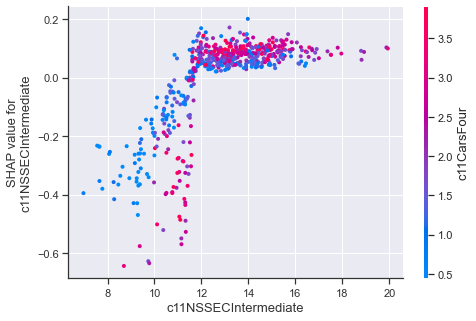

<Figure size 1152x720 with 0 Axes>

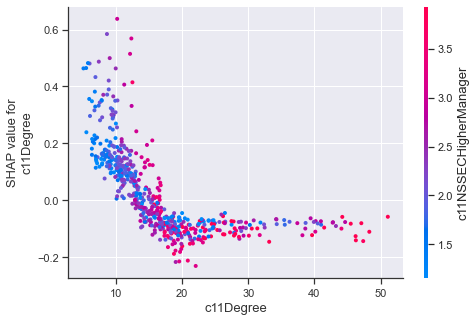

<Figure size 1152x720 with 0 Axes>

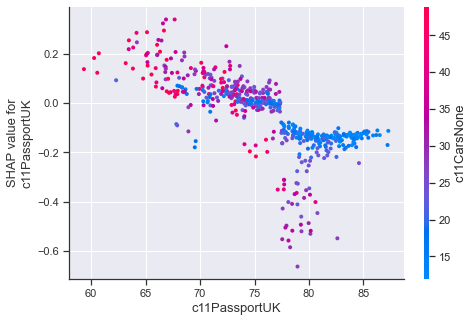

<Figure size 1152x720 with 0 Axes>

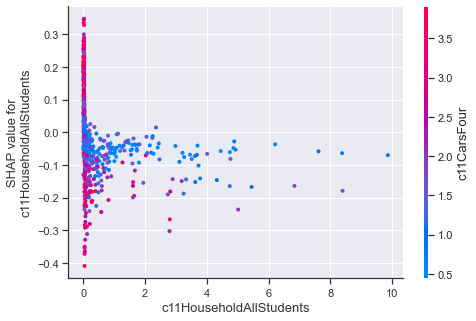

<Figure size 1152x720 with 0 Axes>

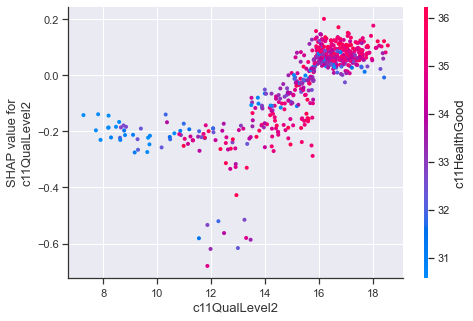

<Figure size 1152x720 with 0 Axes>

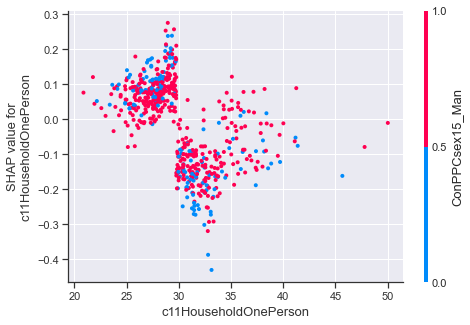

<Figure size 1152x720 with 0 Axes>

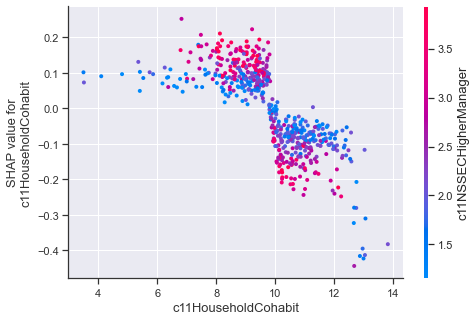

<Figure size 1152x720 with 0 Axes>

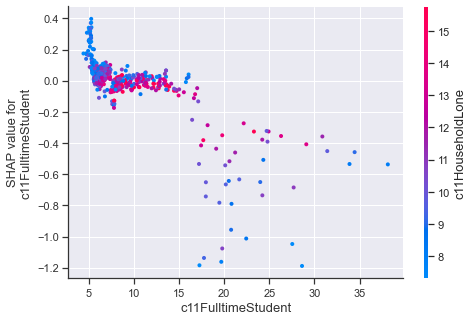

<Figure size 1152x720 with 0 Axes>

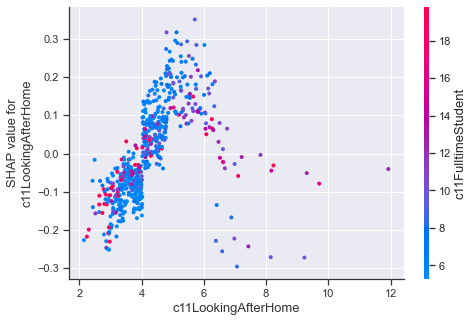

In [19]:
df_simp = pd.get_dummies(BES_census_data.drop(drop_cols,axis=1))

var_stub = "Con17"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df_simp[var_stub].notnull() & (BES_census_data["Country"]!="Scotland")
wt_cols = ["leaveHanretty","remainHanretty"]
min_features = 30
colname = "Con17"
dependence_plots = True

alg = get_xgboost_alg(classification_problem=False)
title = "Con17_minusScotland_minusHanretty"

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_simp[mask].drop(wt_cols,axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=None,
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

In [20]:
search(BES_census_data,"c11Age").index

Index(['c11Age0to4', 'c11Age5to7', 'c11Age8to9', 'c11Age10to14', 'c11Age15',
       'c11Age16to17', 'c11Age18to19', 'c11Age20to24', 'c11Age25to29',
       'c11Age30to44', 'c11Age45to59', 'c11Age60to64', 'c11Age65to74',
       'c11Age75to84', 'c11Age85to89', 'c11Age90plus'],
      dtype='object')

In [21]:
BES_census_data["c11DeprivedMean"] = (BES_census_data["c11Deprived1"]+(BES_census_data["c11Deprived2"]*2)+(BES_census_data["c11Deprived3"]*3)+(BES_census_data["c11Deprived4"]*4))/100

In [22]:
BES_census_data["c11CarsMean"] = (BES_census_data["c11CarsOne"]+(BES_census_data["c11CarsTwo"]*2)+(BES_census_data["c11CarsThree"]*3)+(BES_census_data["c11CarsFour"]*4))/100

In [23]:
BES_census_data[search(BES_census_data,"c11Cars(None|One|Two|Three|Four)").index].sum(axis=1)

0      100.0
1      100.0
2      100.0
3      100.0
4      100.0
       ...  
627    100.0
628    100.0
629    100.0
630    100.0
631    100.0
Length: 632, dtype: float64

In [24]:
BES_census_data["c11AgeMean"] = (
                                 BES_census_data["c11Age18to19"]*18.5+\
                                 BES_census_data["c11Age20to24"]*22+\
                                 BES_census_data["c11Age25to29"]*27+\
                                 BES_census_data["c11Age30to44"]*37+\
                                 BES_census_data["c11Age45to59"]*52+\
                                 BES_census_data["c11Age60to64"]*62+\
                                 BES_census_data["c11Age65to74"]*69.5+\
                                 BES_census_data["c11Age75to84"]*79.5+\
                                 BES_census_data["c11Age85to89"]*87+\
                                 BES_census_data["c11Age90plus"]*95  )/100

# BES_census_data["c11Age0to4"]*2+\
#                                  BES_census_data["c11Age5to7"]*6+\
#                                  BES_census_data["c11Age8to9"]*8.5+\
#                                  BES_census_data["c11Age10to14"]*12+\
#                                  BES_census_data["c11Age15"]*15+\
#                                  BES_census_data["c11Age16to17"]*16.5+\

In [25]:
BES_census_data["c11AgeMean"].describe()

count    632.000000
mean      38.018977
std        3.039776
min       28.249880
25%       36.384312
50%       38.167526
75%       40.090582
max       47.373792
Name: c11AgeMean, dtype: float64

MSE: 23.21, MAE: 3.92, EV: 0.90, R2: 0.90


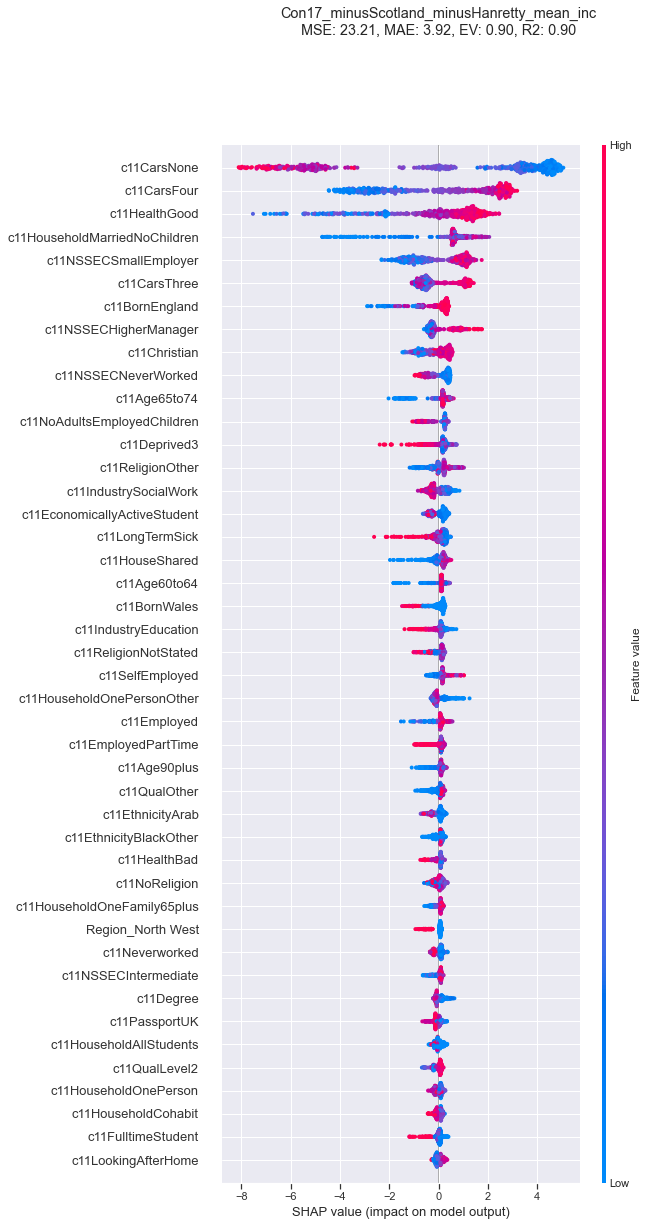

<Figure size 1152x720 with 0 Axes>

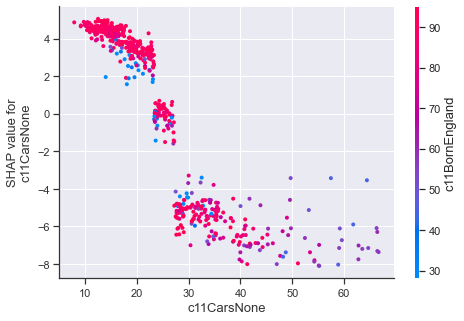

<Figure size 1152x720 with 0 Axes>

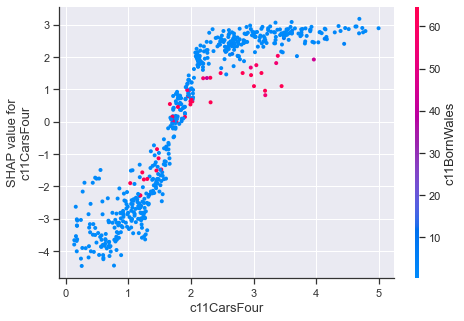

<Figure size 1152x720 with 0 Axes>

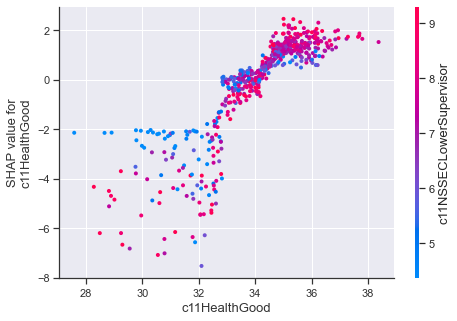

<Figure size 1152x720 with 0 Axes>

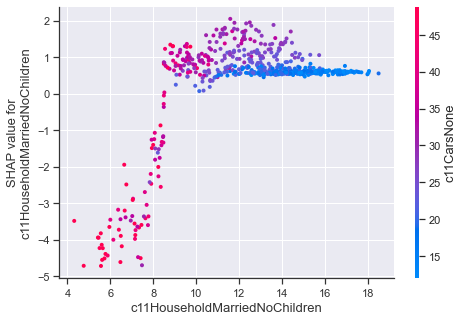

<Figure size 1152x720 with 0 Axes>

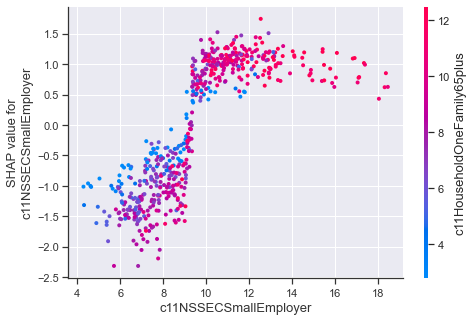

<Figure size 1152x720 with 0 Axes>

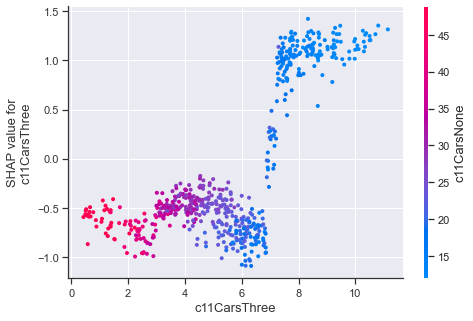

<Figure size 1152x720 with 0 Axes>

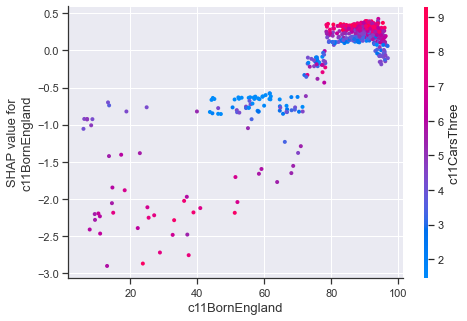

<Figure size 1152x720 with 0 Axes>

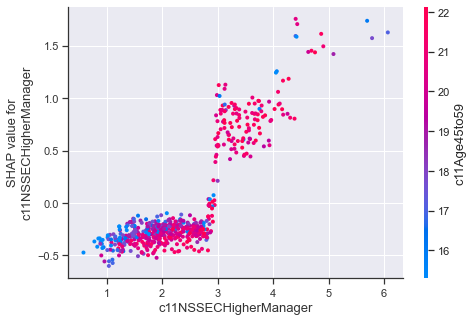

<Figure size 1152x720 with 0 Axes>

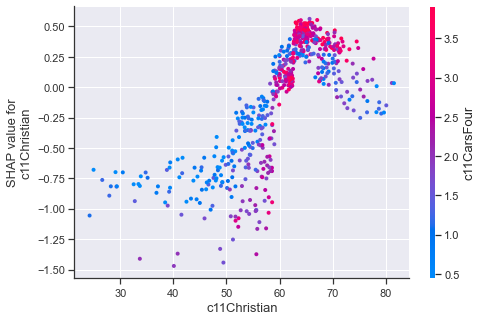

<Figure size 1152x720 with 0 Axes>

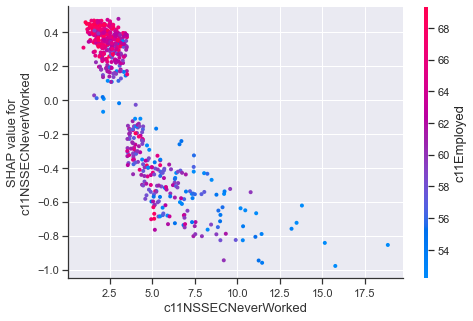

<Figure size 1152x720 with 0 Axes>

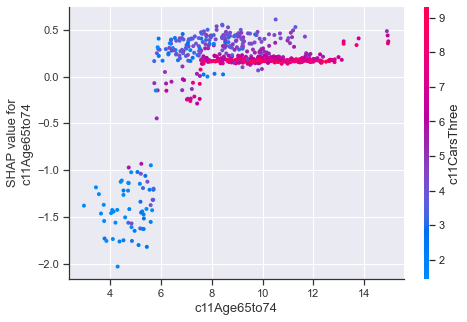

<Figure size 1152x720 with 0 Axes>

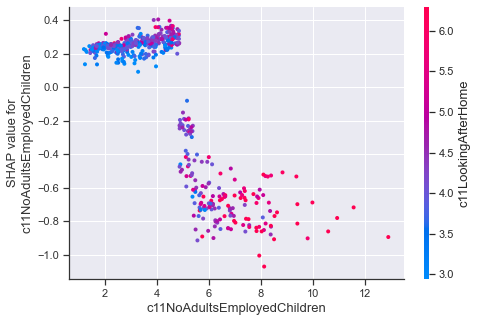

<Figure size 1152x720 with 0 Axes>

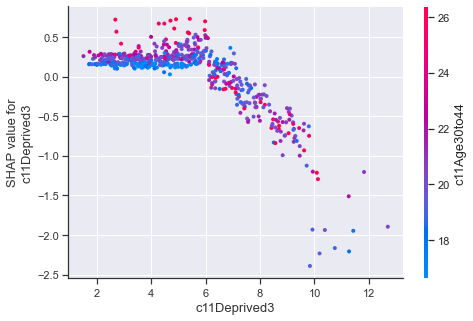

<Figure size 1152x720 with 0 Axes>

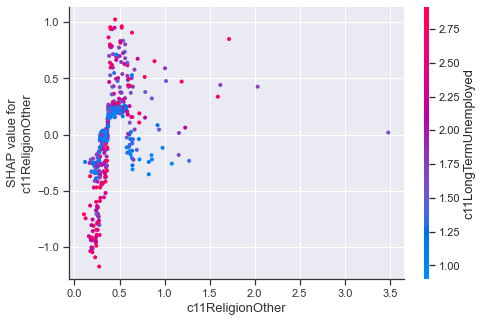

<Figure size 1152x720 with 0 Axes>

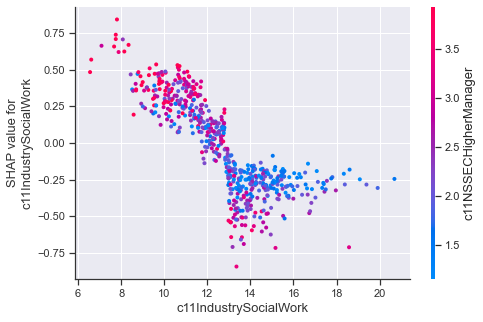

<Figure size 1152x720 with 0 Axes>

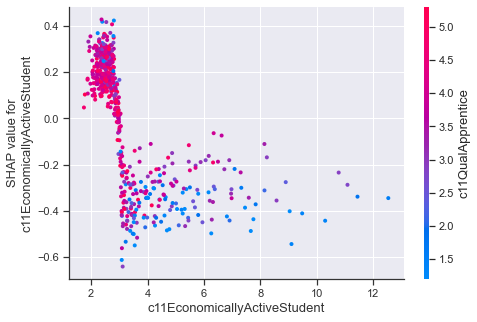

<Figure size 1152x720 with 0 Axes>

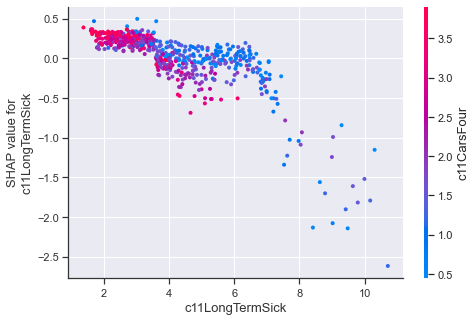

<Figure size 1152x720 with 0 Axes>

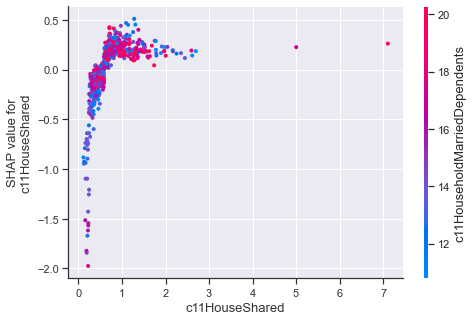

<Figure size 1152x720 with 0 Axes>

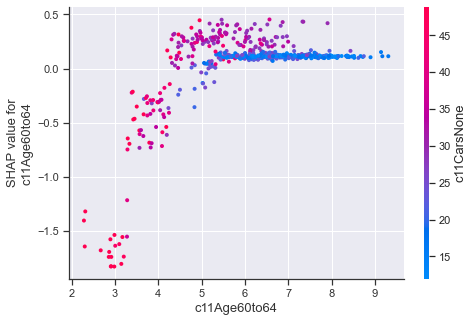

<Figure size 1152x720 with 0 Axes>

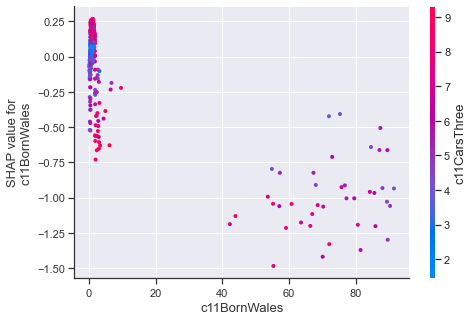

<Figure size 1152x720 with 0 Axes>

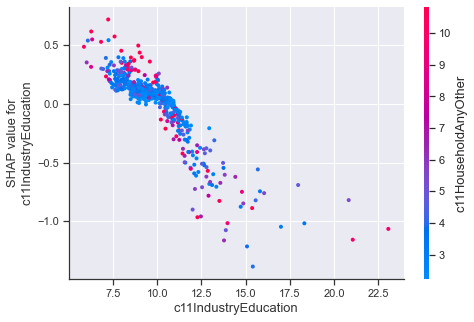

<Figure size 1152x720 with 0 Axes>

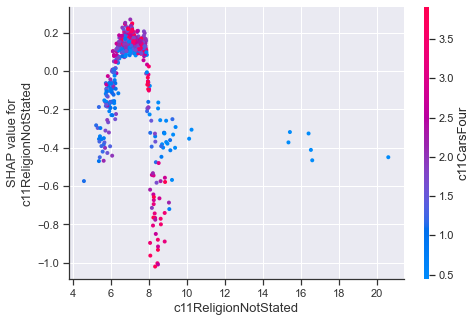

<Figure size 1152x720 with 0 Axes>

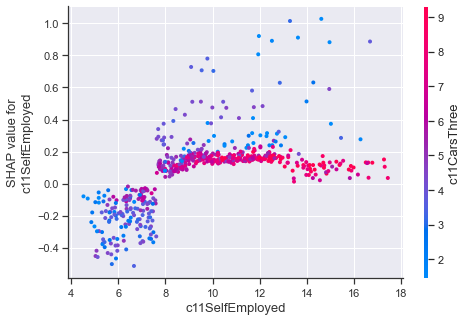

<Figure size 1152x720 with 0 Axes>

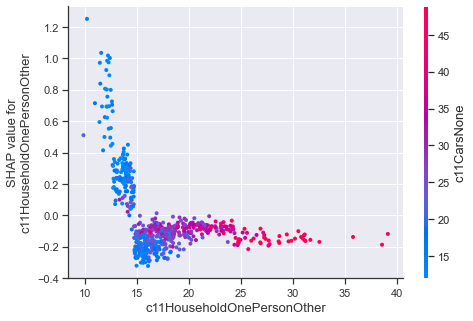

<Figure size 1152x720 with 0 Axes>

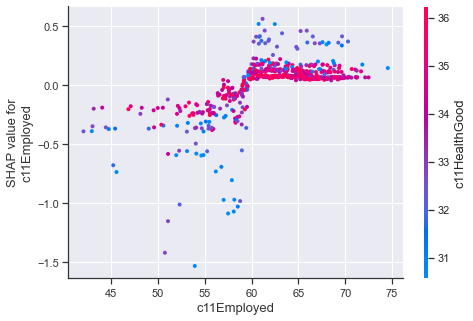

<Figure size 1152x720 with 0 Axes>

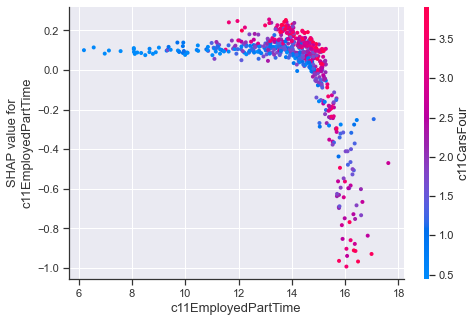

<Figure size 1152x720 with 0 Axes>

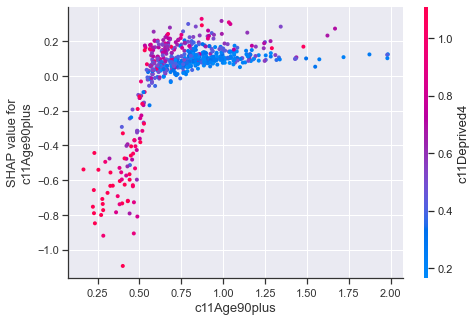

<Figure size 1152x720 with 0 Axes>

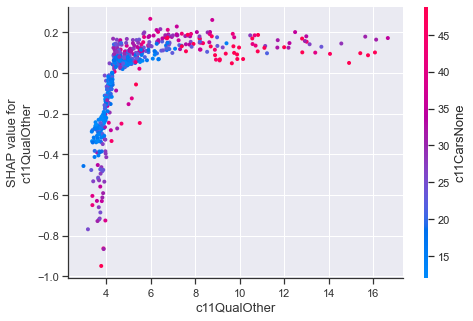

<Figure size 1152x720 with 0 Axes>

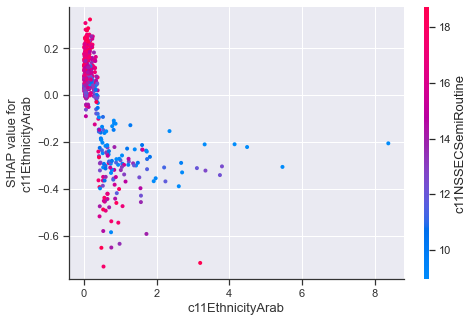

<Figure size 1152x720 with 0 Axes>

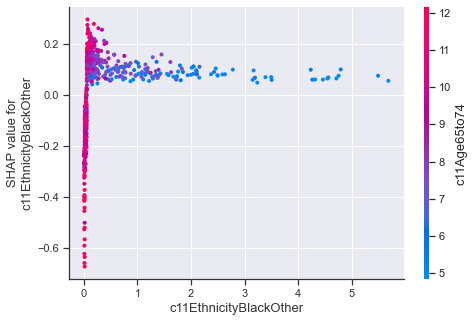

<Figure size 1152x720 with 0 Axes>

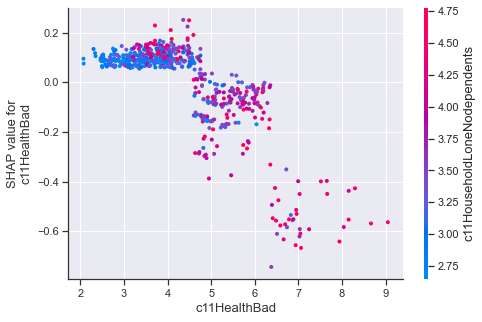

<Figure size 1152x720 with 0 Axes>

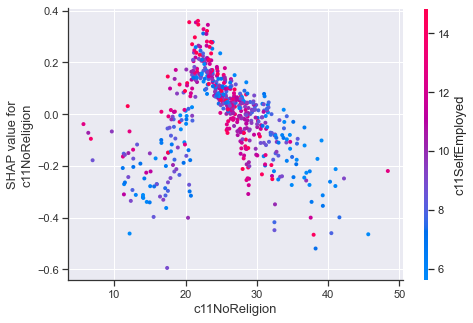

<Figure size 1152x720 with 0 Axes>

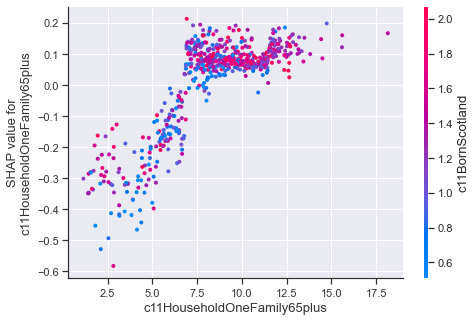

<Figure size 1152x720 with 0 Axes>

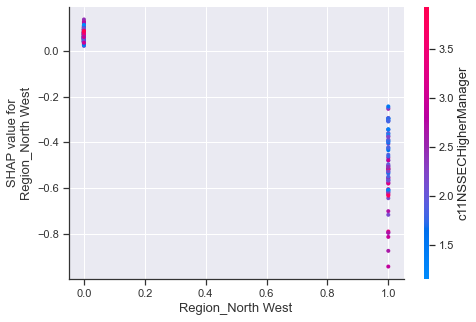

<Figure size 1152x720 with 0 Axes>

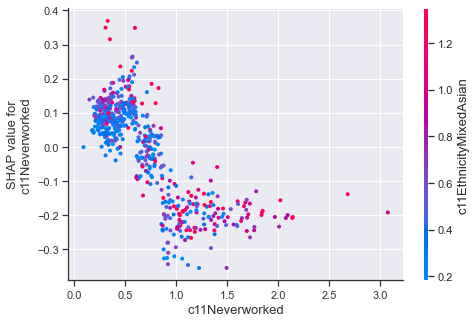

<Figure size 1152x720 with 0 Axes>

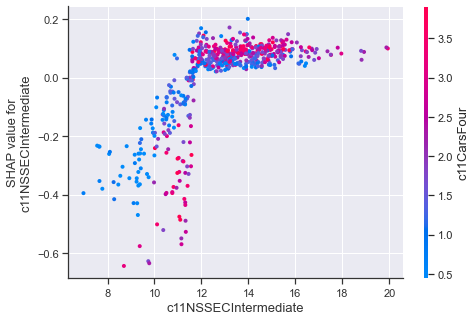

<Figure size 1152x720 with 0 Axes>

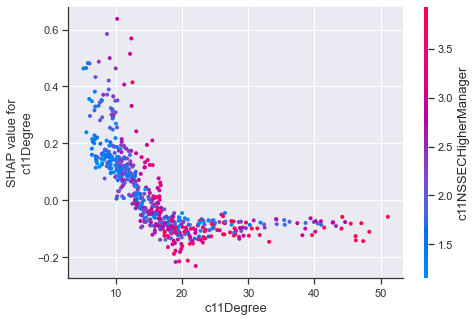

<Figure size 1152x720 with 0 Axes>

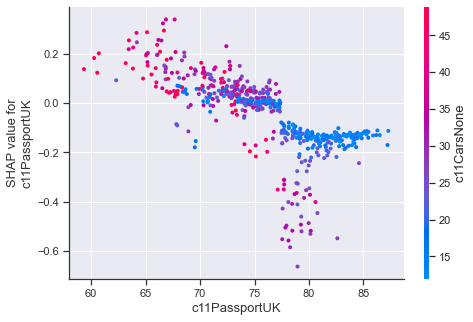

<Figure size 1152x720 with 0 Axes>

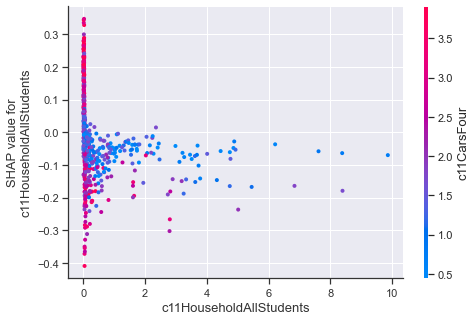

<Figure size 1152x720 with 0 Axes>

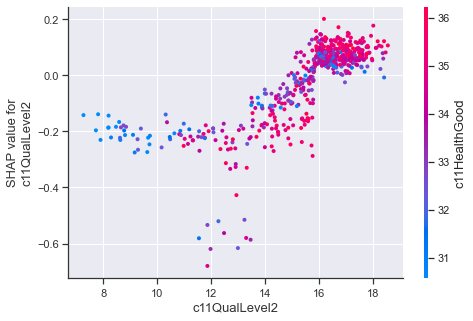

<Figure size 1152x720 with 0 Axes>

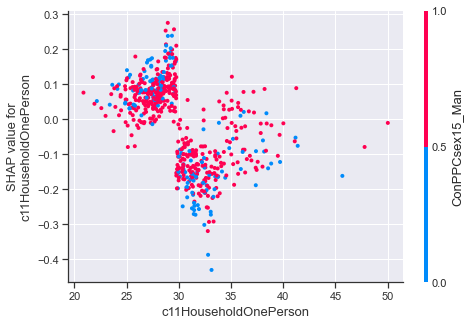

<Figure size 1152x720 with 0 Axes>

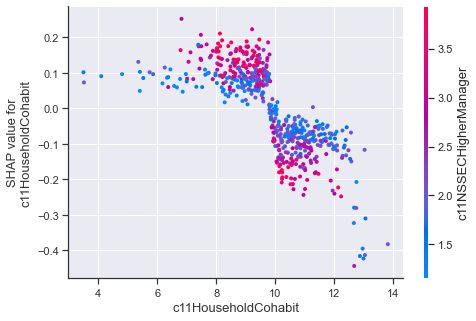

<Figure size 1152x720 with 0 Axes>

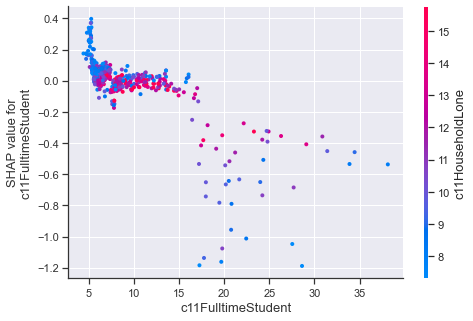

<Figure size 1152x720 with 0 Axes>

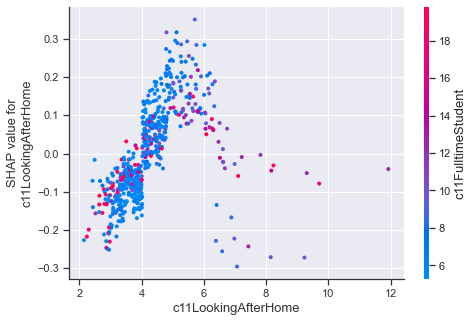

In [26]:
var_stub = "Con17"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df_simp[var_stub].notnull() & (BES_census_data["Country"]!="Scotland")
wt_cols = ["leaveHanretty","remainHanretty",
          ]
min_features = 30
colname = "Con17"
dependence_plots = True

alg = get_xgboost_alg(classification_problem=False)
title = "Con17_minusScotland_minusHanretty_mean_inc"

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_simp[mask].drop(wt_cols,axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=None,
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

In [27]:
var_stub = "Con17"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df_simp[var_stub].notnull() & (BES_census_data["Country"]!="Scotland")
wt_cols = ["leaveHanretty","remainHanretty",
          'c11CarsNone', 'c11CarsOne', 'c11CarsTwo', 'c11CarsThree', 'c11CarsFour', 'c11CarsMean']
min_features = 30
colname = "Con17"
dependence_plots = True

alg = get_xgboost_alg(classification_problem=False)
title = "Con17_minusScotland_minusHanretty_mean_inc_minusCars"

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_simp[mask].drop(wt_cols,axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=None,
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

KeyError: "['c11CarsMean'] not found in axis"

In [ ]:
var_stub = "Con17"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df_simp[var_stub].notnull() & (BES_census_data["Country"]!="Scotland")
wt_cols = ["leaveHanretty","remainHanretty",
          'c11CarsNone', 'c11CarsOne', 'c11CarsTwo', 'c11CarsThree', 'c11CarsFour', 'c11CarsMean',
          'c11HealthVeryGood', 'c11HealthGood', 'c11HealthFair', 'c11HealthBad','c11HealthVeryBad']
min_features = 30
colname = "Con17"
dependence_plots = True

alg = get_xgboost_alg(classification_problem=False)
title = "Con17_minusScotland_minusHanretty_mean_inc_minusCars_minusHealth"

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_simp[mask].drop(wt_cols,axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=None,
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

In [ ]:
var_stub = "Con17"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df_simp[var_stub].notnull() & (BES_census_data["Country"]!="Scotland")
wt_cols = ["leaveHanretty","remainHanretty",
          'c11CarsNone', 'c11CarsOne', 'c11CarsTwo', 'c11CarsThree', 'c11CarsFour', 'c11CarsMean','c11CarsMoreThanNone',
          'c11HealthVeryGood', 'c11HealthGood', 'c11HealthFair', 'c11HealthBad','c11HealthVeryBad','c11HealthMean']
min_features = 30
colname = "Con17"
dependence_plots = True

alg = get_xgboost_alg(classification_problem=False)
title = "Con17_minusScotland_minusHanretty_mean_inc_minusCars_minusHealth"

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_simp[mask].drop(wt_cols,axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=None,
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

In [ ]:
df_simp = pd.get_dummies(BES_census_data.drop(drop_cols,axis=1))

var_stub = "Con17"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df_simp[var_stub].notnull() & (BES_census_data["Country"]!="Scotland")
wt_cols = ["leaveHanretty","remainHanretty",
          
          ]
min_features = 30
colname = "Con17"
dependence_plots = True

alg = get_xgboost_alg(classification_problem=False)
title = "Con17_minusScotland_minusHanretty_mean_inc_justCars"

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_simp[mask].drop(wt_cols,axis=1)[[

'c11DeprivedNone',
 'c11Deprived1',
 'c11Deprived2',
 'c11Deprived3',
 'c11Deprived4',
#  'c11DeprivedMean',
#  'c11DeprivedHigh',
#  'c11DeprivedLow'
]+[var_stub]],
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=None,
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

predCon17 = pd.Series(alg.predict(df_simp[train_columns]),index=df_simp.index)

In [ ]:
list(search(BES_census_data,"Deprived").index)


# .83
#  'c11YoungAdults',
#  'c11Elderly',
#  "c11HealthVeryBad&Bad",
#  "c11HealthFair&Good",
#  "c11CarsMoreThanNone",

In [ ]:
## kids
BES_census_data["c11DeprivedHigh"] =BES_census_data["c11Deprived3"]+BES_census_data["c11Deprived4"]
BES_census_data["c11DeprivedLow"] =BES_census_data["c11Deprived2"]+BES_census_data["c11Deprived1"]+BES_census_data["c11DeprivedNone"]

In [ ]:
## kids
BES_census_data["c11Kids"] =BES_census_data["c11Age0to4"]+\
                            BES_census_data["c11Age5to7"]+\
                            BES_census_data["c11Age8to9"]+\
                            BES_census_data["c11Age10to14"]+\
                            BES_census_data["c11Age15"]+\
                            BES_census_data["c11Age16to17"]
# 'c11Age0to4', 'c11Age5to7', 'c11Age8to9', 'c11Age10to14', 'c11Age15',  'c11Age16to17',
## young adults
BES_census_data["c11YoungAdults"] =BES_census_data["c11Age18to19"]+\
                            BES_census_data["c11Age20to24"]+\
                            BES_census_data["c11Age25to29"]
# 'c11Age18to19', 'c11Age20to24', 'c11Age25to29',
## adult
BES_census_data["c11Adults"] =BES_census_data["c11Age30to44"]+\
                              BES_census_data["c11Age45to59"]
# 'c11Age30to44', 'c11Age45to59',
## elderly
BES_census_data["c11Elderly"] =BES_census_data["c11Age60to64"]+\
                            BES_census_data["c11Age65to74"]+\
                            BES_census_data["c11Age75to84"]+\
                            BES_census_data["c11Age85to89"]+\
                            BES_census_data["c11Age90plus"]
# 'c11Age60to64', 'c11Age65to74', 'c11Age75to84', 'c11Age85to89', 'c11Age90plus'

In [ ]:
## r^ .69 *from just Cars*, r^ .65 from just CarsNone/c11CarsMoreThanNone
## r^.61 from Health (.65 with HealtMean added), c11HealthVeryBad r^2 .37 - not nearly as easy to nail down
# r^2 .62 from Age, r^2 .55
# r^2 .6 from Deprivation .69, .6 with High/Low alone

In [ ]:
BES_census_data["c11HealthMean"] = (BES_census_data["c11HealthVeryBad"]+\
                                    BES_census_data["c11HealthBad"])-\
                                    (BES_census_data["c11HealthFair"]+\
                                    BES_census_data["c11HealthGood"])
                                    ## still not very good

In [ ]:
BES_census_data["c11HealthVeryBad&Bad"] = BES_census_data["c11HealthVeryBad"]+BES_census_data["c11HealthBad"]
BES_census_data["c11HealthFair&Good"] = BES_census_data["c11HealthFair"]+BES_census_data["c11HealthGood"]
BES_census_data["c11CarsMoreThanNone"] = BES_census_data["c11CarsOne"]+BES_census_data["c11CarsTwo"]+BES_census_data["c11CarsThree"]+BES_census_data["c11CarsFour"]

In [ ]:
# search(BES_census_data,"c11Health").index

In [ ]:
# BES_census_data[[ 'Con17', 'Lab17', 'LD17', 'SNP17',
#        'PC17', 'UKIP17', 'Green17']].sum(axis=1)

## vote share is excluding non-voters
## wonder what the best way of measuring whether including non-voting % 'improves' the model?

In [ ]:
merged.loc[ BES_census_data.loc[df_simp.index,"ONSConstID"],"predCon17" ] = predCon17.values

merged["residCon17"] = merged["predCon17"] - merged["Con17"]
merged["residCon17"].loc[merged["Country"]=="Scotland"] = np.nan

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
merged["residCon17"].hist(bins=50,ax=axes[0])
mask = merged["residCon17"].notnull()
# plt.figure()
sns.regplot(merged["predCon17"][mask],merged["Con17"][mask],ax=axes[1])

In [ ]:
# merged["residCon17"].dropna().sort_values()

In [ ]:
# merged["residCon17"].dropna().sort_values()
# merged[merged["residCon17"].notnull()].sort_values(by="residCon17")

In [ ]:
# set a variable that will call whatever column we want to visualise on the map
variable = "residCon17"
# title = 'Leave%\n(Constituency level - estimate by Chris Hanretty)'
title = "Con17 Voteshare Residual %"

# set the range for the choropleth
vmin, vmax = np.floor(merged[variable].min()/10)*10, np.ceil(merged[variable].max()/10)*10

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(16, 12))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title(title, \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: https://www.britishelectionstudy.com/data-objects/linked-data/',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

Treatment = "Chloropleth"
output_subfolder = create_subdir(BES_output_folder,Treatment)
fname = output_subfolder +Treatment + ".png"
# this will save the figure as a high-res png. you can also save as svg
plt.savefig( fname, bbox_inches='tight', dpi=300 )


# fig.savefig('testmap.png', dpi=300)

In [ ]:
# set a variable that will call whatever column we want to visualise on the map
variable = "c11HealthBad&VeryBad"
# title = 'Leave%\n(Constituency level - estimate by Chris Hanretty)'
title = "c11HealthBad&VeryBad %"

# set the range for the choropleth
vmin, vmax = np.floor(merged[variable].min()/10)*10, np.ceil(merged[variable].max()/10)*10

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(16, 12))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title(title, \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: https://www.britishelectionstudy.com/data-objects/linked-data/',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

Treatment = "Chloropleth"
output_subfolder = create_subdir(BES_output_folder,Treatment)
fname = output_subfolder +Treatment + ".png"
# this will save the figure as a high-res png. you can also save as svg
plt.savefig( fname, bbox_inches='tight', dpi=300 )


# fig.savefig('testmap.png', dpi=300)

In [ ]:
merged["c11HealthBad&VeryBad"] = merged["c11HealthBad"]+merged["c11HealthVeryBad"]

In [ ]:
search(merged,"Health")

In [ ]:
# merged.loc[merged["residCon17"].dropna().sort_values().tail(5).index]

In [ ]:
# merged.loc[merged["residCon17"].dropna().sort_values().head(10).index]

In [ ]:
occ_df = pd.read_excel( open(BES_small_data_files+'Census2011-ConstituencyProfile-uk.xlsx','rb'), sheet_name='KS608D' )
occ_df.columns = occ_df.loc[3]
occ_df = occ_df.drop([0,1,2,3,654,])
occ_df

var_list = ["CON%ELEM","CON%OPS","CON%SAL_SERV","CON%CAR_LEI_","CON%SKILL","CON%ADMIN_SEC","CON%ASSOC_PROF_TECH",
 "CON%PROF","CON%MAN_DIR_SEN"]

occ_df = occ_df.set_index("ONSConstID").loc[merged.index]
var_list = ["CON%ELEM","CON%OPS","CON%SAL_SERV","CON%CAR_LEI_","CON%SKILL","CON%ADMIN_SEC","CON%ASSOC_PROF_TECH",
 "CON%PROF","CON%MAN_DIR_SEN"]
merged[var_list] = occ_df[var_list].values
merseyside = ["Birkenhead","Bootle","Garston and Halewood","Knowsley",
             "Liverpool, Riverside","Liverpool, Walton","Liverpool, Wavertree","Liverpool, West Derby",
             "Sefton Central","Southport","St Helens North","St Helens South and Whiston",
             "Wallasey","Wirral South","Wirral West"]
merged["Merseyside"] = merged["PCON13NM"].isin(merseyside)

In [ ]:
###################################################

In [ ]:
import statsmodels.api as sm

In [ ]:
# Welsh language is a pain to get at
# Merseyside


# Birkenhead
# Bootle
# Garston and Halewood
# Knowsley
# Liverpool, Riverside
# Liverpool, Walton
# Liverpool, Wavertree
# Liverpool, West Derby
# Sefton Central
# Southport
# St Helens North
# St Helens South and Whiston
# Wallasey
# Wirral South
# Wirral West

merseyside = ["Birkenhead","Bootle","Garston and Halewood","Knowsley",
             "Liverpool, Riverside","Liverpool, Walton","Liverpool, Wavertree","Liverpool, West Derby",
             "Sefton Central","Southport","St Helens North","St Helens South and Whiston",
             "Wallasey","Wirral South","Wirral West"]
len(merseyside)

## occupational variables - don't use the ones in the BES subset!
# https://commonslibrary.parliament.uk/research-briefings/rp14-10/

# can get from here (sheet KS608D)

## arg - even the age categories aren't the standard ones!

In [ ]:
# JK regression model of area-level 2017 Conservative vote share
# intercept  0.89***
# Deprived3 -4.34
# Level4qual-1.27
# Age55-64  -0.36
# Managers+  2.88
# Sales&Serv-1.53
# Welsh lang-0.26
# Merseyside-0.09

# N=573
# R2=.86 

In [ ]:
welsh_df = pd.read_excel( open(BES_small_data_files+'welsh_constituency_data.xls','rb'), sheet_name='WelshLanguage' )
welsh_df.columns = welsh_df.loc[4]
welsh_df = welsh_df.drop([0,1,2,3,4,50,51,52])
welsh_df = welsh_df.replace("Ynys Môn","Ynys Mon")
welsh_df = welsh_df.set_index("Assembly Constituency Area")
BES_census_data["speakWelsh"] = [welsh_df.loc[x,"Percentage aged 3+ who can speak Welsh"] if x in welsh_df.index else 0 for x in BES_census_data["ConstituencyName"]  ]

occ_df = pd.read_excel( open(BES_small_data_files+'Census2011-ConstituencyProfile-uk.xlsx','rb'), sheet_name='KS608D' )
occ_df.columns = occ_df.loc[3]
occ_df = occ_df.drop([0,1,2,3,654,])
# occ_df

var_list = ["CON%ELEM","CON%OPS","CON%SAL_SERV","CON%CAR_LEI_","CON%SKILL","CON%ADMIN_SEC","CON%ASSOC_PROF_TECH",
 "CON%PROF","CON%MAN_DIR_SEN"]

# occ_df = occ_df.set_index("ONSConstID").loc[merged.index]
# var_list = ["CON%ELEM","CON%OPS","CON%SAL_SERV","CON%CAR_LEI_","CON%SKILL","CON%ADMIN_SEC","CON%ASSOC_PROF_TECH",
#  "CON%PROF","CON%MAN_DIR_SEN"]

BES_census_data[var_list] = occ_df.set_index("ONSConstID").loc[BES_census_data["ONSConstID"]][var_list].values

merseyside = ["Birkenhead","Bootle","Garston and Halewood","Knowsley",
             "Liverpool, Riverside","Liverpool, Walton","Liverpool, Wavertree","Liverpool, West Derby",
             "Sefton Central","Southport","St Helens North","St Helens South and Whiston",
             "Wallasey","Wirral South","Wirral West"]

BES_census_data["Merseyside"] = BES_census_data["ConstituencyName"].isin(merseyside).astype('float')

In [ ]:
# merged

jk_list = ["c11Deprived3","c11QualLevel4","c11Age60to64","CON%MAN_DIR_SEN","CON%SAL_SERV","Merseyside",]

In [ ]:
# merged.columns[-200:-150]
# dataset[jk_list]["CON%MAN_DIR_SEN"]

In [ ]:
dataset = merged[merged["Country"].isin(["England","Wales"])]

Y = dataset['Con17']/100
X = dataset[jk_list].astype('float')
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params
#  merged["Con17"]

In [ ]:
# intercept  0.89***
# Deprived3 -4.34
# Level4qual-1.27
# Age55-64  -0.36
# Managers+  2.88
# Sales&Serv-1.53
# Welsh lang-0.26
# Merseyside-0.09

## looks like they made a transcription booboo and multiplied everything but Merseyside by 100
# results not identical, but missing *welsh lang* and *age category* not identical

In [ ]:
# model.predict(results.params)

In [ ]:
# merged.loc[ BES_census_data.loc[df_simp.index,"ONSConstID"],"predCon17" ] = predCon17.values

# merged["residCon17"] = merged["predCon17"] - merged["Con17"]
# merged["residCon17"].loc[merged["Country"]=="Scotland"] = np.nan

# fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
# merged["residCon17"].hist(bins=50,ax=axes[0])
# mask = merged["residCon17"].notnull()
# # plt.figure()
# sns.regplot(merged["predCon17"][mask],merged["Con17"][mask],ax=axes[1])

In [ ]:
merged["predCon17"]=np.nan
merged.loc[dataset.index,"predCon17"] = model.predict(results.params)*100
merged["residCon17"] = merged["Con17"] - merged["predCon17"]

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
merged["residCon17"].hist(bins=50,ax=axes[0])
mask = merged["residCon17"].notnull()
# plt.figure()
sns.regplot(merged["predCon17"][mask],merged["Con17"][mask],ax=axes[1])

In [ ]:
merged["residCon17_top75"] = merged["residCon17"]<merged["residCon17"].quantile(.25)

# set a variable that will call whatever column we want to visualise on the map
variable = "residCon17_top75"
# title = 'Leave%\n(Constituency level - estimate by Chris Hanretty)'
title = "Con17 Voteshare Residual top75%"

# set the range for the choropleth
vmin, vmax = np.floor(merged[variable].min()/10)*10, np.ceil(merged[variable].max()/10)*10

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(16, 12))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title(title, \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: https://www.britishelectionstudy.com/data-objects/linked-data/',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

Treatment = "Chloropleth"
output_subfolder = create_subdir(BES_output_folder,Treatment)
fname = output_subfolder +Treatment + ".png"
# this will save the figure as a high-res png. you can also save as svg
plt.savefig( fname, bbox_inches='tight', dpi=1000 )

# fig.savefig('testmap.png', dpi=300)

In [ ]:
## guess I could exclude wales!

# https://statswales.gov.wales/Catalogue/Welsh-Language/Census-Welsh-Language/welshlanguageskills-by-ediv-2011census


In [ ]:
# welsh_df = pd.read_csv(BES_small_data_files+"welshlanguageskills.csv")
# welsh_df
# welsh_df.drop(['Unnamed: 0', 'Unnamed: 1'],axis=1).dropna()

## wrong geo subunits!

In [ ]:
# pd.read_excel(BES_small_data_files+"welsh_constituency_data.xls",sheet="WelshLanguage")


In [ ]:
# welsh_df.loc[ [x.strip() for x in merged[merged["Country"]=="Wales"].index] ]

In [ ]:
# [welsh_df.loc[x] for x in merged[merged["Country"]=="Wales"]["PCON13NM"].values]


In [ ]:
import statsmodels.api as sm
jk_list = ["c11Deprived3","c11QualLevel4","c11Age60to64","CON%MAN_DIR_SEN","CON%SAL_SERV","Merseyside","speakWelsh"]
dataset = merged[merged["Country"].isin(["England","Wales"])]

Y = dataset['Con17']/100
X = dataset[jk_list].astype('float')
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()


In [ ]:
results.params

In [ ]:
# intercept  0.89***
# Deprived3 -4.34
# Level4qual-1.27
# Age55-64  -0.36
# Managers+  2.88
# Sales&Serv-1.53
# Welsh lang-0.26
# Merseyside-0.09

## looks like they made a transcription booboo and multiplied everything but Merseyside by 100
# results not identical, but missing *welsh lang* and *age category* not identical

In [ ]:
merged["predCon17"]=np.nan
merged.loc[dataset.index,"predCon17"] = model.predict(results.params)*100
merged["residCon17"] = merged["Con17"] - merged["predCon17"]

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
merged["residCon17"].hist(bins=50,ax=axes[0])
mask = merged["residCon17"].notnull()
# plt.figure()
sns.regplot(merged["predCon17"][mask],merged["Con17"][mask],ax=axes[1])

In [ ]:
merged["residCon17_jkrep"] = merged["residCon17"]

## save this for comparison!

In [ ]:
merged["residCon17_top75"] = merged["residCon17_jkrep"]<merged["residCon17_jkrep"].quantile(.25)
merged.loc[merged["Country"].isin(["Scotland"]),"residCon17_top75"]=np.nan
# set a variable that will call whatever column we want to visualise on the map
variable = "residCon17_top75"
# title = 'Leave%\n(Constituency level - estimate by Chris Hanretty)'
title = "Con17 Res top75%(JK Replication)"

# set the range for the choropleth
vmin, vmax = np.floor(merged[variable].min()/10)*10, np.ceil(merged[variable].max()/10)*10

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(16, 12))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title(title, \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: https://www.britishelectionstudy.com/data-objects/linked-data/',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

Treatment = "Chloropleth"
output_subfolder = create_subdir(BES_output_folder,Treatment)
fname = output_subfolder +title +".png"
# this will save the figure as a high-res png. you can also save as svg
plt.savefig( fname, bbox_inches='tight', dpi=1000 )

# fig.savefig('testmap.png', dpi=300)

In [ ]:
##### 

In [ ]:
BES_census_data["ConstituencyName"] = BES_census_data["ConstituencyName"].replace("Ynys Môn","Ynys Mon")
BES_census_data["Merseyside"] = BES_census_data["ConstituencyName"].isin(merseyside).astype(float)
BES_census_data["speakWelsh"] = [welsh_df.loc[x,"Percentage aged 3+ who can speak Welsh"] if x in welsh_df.index else 0 for x in BES_census_data["ConstituencyName"]  ]
var_list = ["CON%ELEM","CON%OPS","CON%SAL_SERV","CON%CAR_LEI_","CON%SKILL","CON%ADMIN_SEC","CON%ASSOC_PROF_TECH",
 "CON%PROF","CON%MAN_DIR_SEN"]
BES_census_data[var_list] = occ_df.loc[BES_census_data["ONSConstID"],var_list].values

In [ ]:
df_simp = pd.get_dummies(BES_census_data.drop(drop_cols,axis=1))

var_stub = "Con17"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df_simp[var_stub].notnull() & (BES_census_data["Country"]!="Scotland")
wt_cols = ["leaveHanretty","remainHanretty"]
min_features = 30
colname = "Con17"
dependence_plots = True

alg = get_xgboost_alg(classification_problem=False)
title = "Con17_minusScotland_minusHanretty"

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_simp[mask].drop(wt_cols,axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=None,
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

In [ ]:
better_half_nonlinear = train_columns[np.abs(shap_values).mean(0)>pd.Series(np.abs(shap_values).mean(0)).quantile(.5)]
better_half_nonlinear

In [ ]:
var_stub = "Con17"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df_simp[var_stub].notnull() & (BES_census_data["Country"]!="Scotland")
wt_cols = ["leaveHanretty","remainHanretty"]
min_features = 30
colname = "Con17"
dependence_plots = True

alg = get_xgboost_alg(classification_problem=False)
alg.max_depth=1 ## try to force to linearity!
title = "Con17_minusScotland_minusHanretty_linear"

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_simp[mask].drop(wt_cols,axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=None,
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

In [ ]:
better_half_linear = train_columns[np.abs(shap_values).mean(0)>0]

In [ ]:
len([x for x in better_half_linear if x in better_half_nonlinear]),len(better_half_linear),len(better_half_nonlinear),

In [ ]:
smaller_set = [x for x in better_half_linear if x in better_half_nonlinear]

In [ ]:
"speakWelsh" in better_half_nonlinear

In [ ]:
var_stub = "Con17"
Treatment = var_stub

specific_vars = ["c11CarsNone","c11HealthGood","c11NSSECSmallEmployer",
                 "c11HouseholdMarriedNoChildren","c11Deprived3","c11Christian"]

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df_simp[var_stub].notnull() & (BES_census_data["Country"]!="Scotland")
wt_cols = ["leaveHanretty","remainHanretty"]
min_features = 30
colname = "Con17"
dependence_plots = True

alg = get_xgboost_alg(classification_problem=False)
title = "Con17_smaller_var_set"

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_simp[mask].drop(wt_cols,axis=1)[specific_vars+[var_stub]],
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=None,
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

In [ ]:
predCon17 = pd.Series(alg.predict(df_simp[train_columns]),index=df_simp.index)

In [ ]:
merged["predCon17"]=np.nan
merged.loc[ BES_census_data.loc[df_simp.index,"ONSConstID"],"predCon17" ] = predCon17.values
# merged.loc[dataset.index,"predCon17"] = model.predict(results.params)*100
merged["residCon17"] = merged["Con17"] - merged["predCon17"]

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
merged["residCon17"].hist(bins=50,ax=axes[0])
mask = merged["residCon17"].notnull()
# plt.figure()
sns.regplot(merged["predCon17"][mask],merged["Con17"][mask],ax=axes[1])

In [ ]:
merged["residCon17_top75"] = merged["residCon17"]<merged["residCon17"].quantile(.25)
merged.loc[merged["Country"].isin(["Scotland"]),"residCon17_top75"]=np.nan

# set a variable that will call whatever column we want to visualise on the map
variable = "residCon17_top75"
# title = 'Leave%\n(Constituency level - estimate by Chris Hanretty)'
title = "Con17 Voteshare Residual top75%"

# set the range for the choropleth
vmin, vmax = np.floor(merged[variable].min()/10)*10, np.ceil(merged[variable].max()/10)*10

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(16, 12))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title(title, \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: https://www.britishelectionstudy.com/data-objects/linked-data/',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

Treatment = "Chloropleth"
output_subfolder = create_subdir(BES_output_folder,Treatment)
fname = output_subfolder +title +".png"
# this will save the figure as a high-res png. you can also save as svg
plt.savefig( fname, bbox_inches='tight', dpi=1000 )

# fig.savefig('testmap.png', dpi=300)

In [ ]:
merged["residCon17_top75"] = merged["residCon17"]<merged["residCon17"].quantile(.25)
merged.loc[merged["Country"].isin(["Scotland"]),"residCon17_top75"]=np.nan
new_fit_binary = merged["residCon17_top75"].copy()

merged["residCon17_top75"] = merged["residCon17_jkrep"]<merged["residCon17_jkrep"].quantile(.25)
merged.loc[merged["Country"].isin(["Scotland"]),"residCon17_top75"]=np.nan
jk_fit_binary = merged["residCon17_top75"].copy()

In [ ]:
new_fit_binary.value_counts()

In [ ]:
jk_fit_binary.value_counts()

In [ ]:
(new_fit_binary*jk_fit_binary).sum()

In [ ]:
hacker_stats = pd.DataFrame( np.random.rand(new_fit_binary.shape[0],10000)<new_fit_binary.mean() ).astype(float)
hacker_stats.apply(lambda x: (x*jk_fit_binary.values).sum()).hist(bins=100)

In [ ]:
sns.regplot(x=merged["residCon17"],y=merged["residCon17_jkrep"])

In [ ]:
import statsmodels.api as sm
dataset = merged[merged["Country"].isin(["England","Wales"])]

Y = dataset['Con17']/100
X = dataset[specific_vars].astype('float')
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

In [ ]:
## let's try putting JKES's variables into a forest regression

In [ ]:
%%time
masked_df_simp = df_simp[mask].copy()
Y = masked_df_simp[var_stub]
res_store = pd.DataFrame(columns = ["r2","cond"])




for spec_vars in list(combinations(list(better_half_linear),3)):

    model = sm.OLS(Y,sm.add_constant(masked_df_simp[list(spec_vars)]))
    results = model.fit()
    res_store.loc["|".join(spec_vars)] = [results.rsquared,results.condition_number]

In [ ]:
res_store.sort_values(by='cond',ascending=False).head(200)
# c11Male,c11Female - drop one!
# c11Households,c11Communal
# c11HouseSocial|c11HouseSocialLA|c11HouseSocialOther

In [ ]:
BES_census_data[["c11Male","c11Female","c11Households","c11Communal","c11HouseSocial","c11HouseSocialLA","c11HouseSocialOther"]].corr()

In [ ]:
BES_census_data.drop(strict_drop_vars,axis=1).corr(min_periods=10).replace(1,0).max().sort_values().dropna().tail(50)

In [ ]:
BES_census_data.corr(min_periods=10)["c11Households"].sort_values().dropna()

In [ ]:
BES_census_data[["c11BornScotland","c11Households"]]

In [ ]:
# c11LongTermUnemployed<->c11NSSECLongtermUnemployed,c11Unemployed
# Green17, GreenVote17 
# c11HousePrivateLandlord <-> c11HousePrivate
# Green10 <-> GreenVote10
# c11FulltimeStudent <-> c11EconomicallyInactiveStudent
# c11PassportEU <-> c11BornOtherEU
# c11HouseholdLone <-> c11HouseholdLoneDependents
# c11PassportIreland <-> c11EthnicityWhiteIrish
# c11EthnicityWhiteBritish <-> c11EthnicityWhite

# c11EconomicActive             -1.000000
# c11EconomicInactive           -1.000000
# c11Male                       -1.000000
# c11Female                     -1.000000
# remainHanretty                -1.000000
# leaveHanretty                 -1.000000

# c11PassportNone               -0.994953
# c11PassportAny                -0.994953

# c11BornScotland               -0.993506
# c11Households                 -0.993506
# ???????


# c11BornOther                  -0.987962
# c11EthnicityWhiteBritish      -0.982135 (c11BornOther)
# c11BornUK                     -0.987962

# c11EnglishAll                 -0.986686
# c11EnglishNone                -0.986686
# c11EnglishOne                 -0.980912 (c11EnglishAll)

# c11Households                 -1.000000
# c11Communal                   -1.000000


strict_drop_vars = ["c11LongTermUnemployed","c11Unemployed","c11HousePrivateLandlord",
                    "c11EconomicallyInactiveStudent","c11PassportIreland","c11HouseholdLoneDependents","c11PassportEU",
                    "c11BornOther","c11BornUK","c11EthnicityWhite","c11EconomicInactive","c11Male",
                    "remainHanretty","leaveHanretty","c11PassportNone","c11EnglishAll","c11EnglishOne","c11Communal"]

In [ ]:
df_simp.drop(strict_drop_vars,axis=1)

In [ ]:
res_store["r2"].hist(bins=100)

In [ ]:
res_store["cond"].apply(lambda x: np.log10(x)).hist(bins=100)

In [ ]:
pd.DataFrame([x.split("|") for x in res_store[(res_store["r2"]>=.6)&(res_store["cond"]<=350)].index]).stack().value_counts().head(50)

vc = pd.DataFrame([x.split("|") for x in res_store[(res_store["r2"]>=.6)&(res_store["cond"]<=350)].index]).stack().value_counts()
vc[vc>=540].index

In [ ]:
final_cut = ['c11CarsFour', 'c11Deprived3', 'c11CarsThree', 'c11CarsNone',
       'c11HouseholdMarriedNoChildren', 'c11NoAdultsEmployedChildren',
       'c11NSSECHigherManager', 'CON%MAN_DIR_SEN', 'c11Neverworked',
       'c11HealthBad', 'c11HouseholdLone', 'c11NSSECNeverWorked',
       'c11HouseholdOnePersonOther', 'c11FulltimeStudent', 'c11Age65to74',
       'c11Age60to64', 'c11HouseholdLoneNodependents',
       'c11EconomicallyActiveStudent', 'c11IndustryConstruction', 'c11Degree',
       'c11NSSECIntermediate', 'c11IndustrySocialWork', 'c11LookingAfterHome',
       'c11Age16to17', 'c11HouseSocial', 'CON%PROF', 'c11Deprived4',
       'c11NSSECSmallEmployer']

res_store_5 = pd.DataFrame(columns = ["r2","cond"])

for spec_vars in list(combinations(final_cut,5)):

    model = sm.OLS(Y,sm.add_constant(masked_df_simp[list(spec_vars)]))
    results = model.fit()
    res_store_5.loc["|".join(spec_vars)] = [results.rsquared,results.condition_number]

In [ ]:
res_store_5.sort_values(by='r2',ascending=False).head(200).head(50)

In [ ]:
# CON%MAN_DIR_SEN
# c11Degree
# c11HealthBad
# c11Deprived3|c11NSSECNeverWorked|?c11Neverworked

In [ ]:
res_store_5["r2"].hist(bins=100)

In [ ]:
res_store_5["cond"].hist(bins=100)

In [ ]:
pd.DataFrame([x.split("|") for x in res_store_5[(res_store_5["r2"]>=.7)].index]).stack().value_counts().head(50)

# vc = pd.DataFrame([x.split("|") for x in res_store[(res_store["r2"]>=.6)&(res_store["cond"]<=350)].index]).stack().value_counts()
# vc[vc>=540].index

In [ ]:
pd.DataFrame([x.split("|") for x in res_store_5[(res_store_5["r2"]>=.84)].index]).stack().value_counts().head(50)

In [ ]:
final_cut = ['c11CarsFour', 'c11Deprived3', 'c11CarsThree', 'c11CarsNone',
       'c11HouseholdMarriedNoChildren', 'c11NoAdultsEmployedChildren',
       'c11NSSECHigherManager', 'CON%MAN_DIR_SEN', 'c11Neverworked',
       'c11HealthBad', 'c11HouseholdLone', 'c11NSSECNeverWorked',
       'c11HouseholdOnePersonOther', 'c11FulltimeStudent', 'c11Age65to74',
       'c11Age60to64', 'c11HouseholdLoneNodependents',
       'c11EconomicallyActiveStudent', 'c11IndustryConstruction', 'c11Degree',
       'c11NSSECIntermediate', 'c11IndustrySocialWork', 'c11LookingAfterHome',
       'c11Age16to17', 'c11HouseSocial', 'CON%PROF', 'c11Deprived4',
       'c11NSSECSmallEmployer']+['c11BornEngland','c11Christian','speakWelsh','Merseyside','CON%SAL_SERV','c11QualLevel4']
['c11Neverworked','c11CarsFour','c11NSSECHigherManager']
masked_df_simp[final_cut].corr().replace(1,np.nan)["c11QualLevel4"].sort_values()
## too much, drop 

In [ ]:
final_cut = ['c11CarsFour', 'c11Deprived3', 'c11CarsThree', 'c11CarsNone',
       'c11HouseholdMarriedNoChildren', 'c11NoAdultsEmployedChildren',
       'c11NSSECHigherManager', 'CON%MAN_DIR_SEN', 'c11Neverworked',
       'c11HealthBad', 'c11HouseholdLone', 'c11NSSECNeverWorked',
       'c11HouseholdOnePersonOther', 'c11FulltimeStudent', 'c11Age65to74',
       'c11Age60to64', 'c11HouseholdLoneNodependents',
       'c11EconomicallyActiveStudent', 'c11IndustryConstruction', 'c11Degree',
       'c11NSSECIntermediate', 'c11IndustrySocialWork', 'c11LookingAfterHome',
       'c11Age16to17', 'c11HouseSocial', 'CON%PROF', 'c11Deprived4',
       'c11NSSECSmallEmployer']+['c11BornEngland','c11Christian','speakWelsh','Merseyside','CON%SAL_SERV','c11QualLevel4']

# "c11Deprived3","c11QualLevel4","c11Age60to64","CON%MAN_DIR_SEN","CON%SAL_SERV",
#                  "Merseyside","speakWelsh",

#                  "c11NSSECSmallEmployer",
#                  "c11NSSECHigherManager",
#                  "c11NSSECNeverWorked",
#                  "c11HouseholdMarriedNoChildren",
#                  "c11Deprived3",
#                  "c11Christian",
#                  "c11BornEngland",

res_store_5_add = pd.DataFrame(columns = ["r2","cond"])

for spec_vars in list(combinations(final_cut,5)):

    model = sm.OLS(Y,sm.add_constant(masked_df_simp[list(spec_vars)]))
    results = model.fit()
    res_store_5_add.loc["|".join(spec_vars)] = [results.rsquared,results.condition_number]

In [ ]:
res_store_5_add.sort_values(by='r2',ascending=False).head(50)

In [ ]:
import scipy.special
scipy.special.comb(len(better_half_linear),3)

In [ ]:
scipy.special.comb(28,5)

In [ ]:
scipy.special.comb(28+7,6)

In [ ]:
1623160/98280

In [ ]:
scipy.special.comb(50,5)*(100/100000)/3600

In [ ]:
scipy.special.comb(240,4)*(100/100000)/3600

In [ ]:
scipy.special.comb(30,7)*(100/100000)/3600

In [ ]:
(2275280.0*11.3/10000)/3600
# .7 hrs is manageable!

In [ ]:
(134810340.0*11.3/10000)/3600
# need to reduce by factor 5

In [ ]:
pre_made_list = list(combinations(list(masked_df_simp.drop(["leaveHanretty","remainHanretty","Con17"],axis=1).columns),3))[0:10000]

In [ ]:
%%time
masked_df_simp["const"]=1.0
# res_store_3_open = pd.DataFrame(columns = ["r2","cond"])
long_list=list(combinations(list(masked_df_simp.drop(strict_drop_vars+["Con17"],axis=1).columns),3))
res_list = []
for spec_vars in list(combinations(list(masked_df_simp.drop(strict_drop_vars+["Con17"],axis=1).columns),3)):
#     test = masked_df_simp.loc[:,list(spec_vars)]
    results = sm.OLS(masked_df_simp["Con17"],masked_df_simp[list(spec_vars)+["const"]]).fit()
    res_list.append((results.rsquared,results.condition_number))
#     res_store_3_open.loc["|".join(spec_vars)] = [results.rsquared,results.condition_number]

res_store_3_open = pd.DataFrame(res_list,index = long_list)
res_store_3_open.columns = ["r2","cond"]
res_store_3_open.sort_values(by="r2",ascending=False)

In [ ]:
res_store_3_open.sort_values(by="r2",ascending=False).head(50)

In [ ]:
top_160 = pd.DataFrame([list(x) for x in res_store_3_open[(res_store_3_open["r2"]>.5)&(res_store_3_open["cond"]<1000)].index]).stack().value_counts().index[0:160]

In [ ]:
%%time
masked_df_simp["const"]=1.0

long_list=list(combinations(top_160,4))
res_list = []
for spec_vars in long_list:

    results = sm.OLS(masked_df_simp["Con17"],masked_df_simp[list(spec_vars)+["const"]]).fit()
    res_list.append((results.rsquared,results.condition_number))

res_store_4_top160 = pd.DataFrame(res_list,index = long_list)
res_store_4_top160.columns = ["r2","cond"]
res_store_4_top160.sort_values(by="r2",ascending=False)

In [ ]:
res_store_4_top160.sort_values(by="r2",ascending=False).head(50)

In [ ]:
## c11HealthGood (and Cars implicitly), both seem to raise condition no v high (high collinearity)

# CON%MAN_DIR_SEN+(c11Degree/c11QualLevel4)+(c11LongTermSick/c11Deprived3/c11Health?)

In [ ]:
# SNPPPCrace15_BME                   0.000000
# Country_Scotland                   0.000000
# Region_Scotland                    0.000000
# SNPPPCrace15_White                 0.000000
# SNPPPCsex17_Woman                  0.000000
# SNPPPCsex15_Woman                  0.000000
# SNPPPCsex15_Man                    0.000000
# c11BornUKNotSpecified              0.000132
# c11PassportCentralAmerica          0.000553
# PCPPCrace15_BME                    0.001745
# SNPPPCsex17_Man                    0.001745

# drop these automatically as too low variance

In [ ]:
masked_df_simp.var().sort_values().head(20)

In [ ]:
list(top_160)

In [ ]:
## top 50 variables!

In [ ]:
top_50 = pd.DataFrame([list(x) for x in res_store_4_top160[(res_store_4_top160["r2"]>.6)&(res_store_4_top160["cond"]<1000)].index]).stack().value_counts().index[0:50]

In [ ]:
top_50

In [ ]:
# res_store_4_top160["cond"].hist(bins=100)

In [ ]:
%%time
masked_df_simp["const"]=1.0

long_list=list(combinations(top_50,5))
res_list = []
for spec_vars in long_list:

    results = sm.OLS(masked_df_simp["Con17"],masked_df_simp[list(spec_vars)+["const"]]).fit()
    res_list.append((results.rsquared,results.condition_number))

res_store_5_top50 = pd.DataFrame(res_list,index = long_list)
res_store_5_top50.columns = ["r2","cond"]
res_store_5_top50.sort_values(by="r2",ascending=False)

In [ ]:
res_store_5_top50.sort_values(by="r2",ascending=False).head(50)

In [ ]:
# CON%MAN_DIR_SEN,c11Degree(/quallevel4 wasn't included),c11NSSECNeverWorked(Deprived3/c11Neverworked),
# c11HealthGood(/student/age25-29)

In [ ]:
res_store_5_top50["r2"].hist(bins=100)

In [ ]:
res_store_5_top50["cond"].hist(bins=100)

In [ ]:
pd.DataFrame([list(x) for x in res_store_5_top50[(res_store_5_top50["r2"]>.7)&(res_store_5_top50["cond"]<750)].index]).stack().value_counts()

In [ ]:
## worst performers / offenders on high cond no

# c11HouseOwned                     15239
# c11DeprivedNone                   11367
# c11HealthGood                      2132

### How about drop these three and add c11QualLevel4, speakWelsh, Merseyside

In [ ]:
top_50 = [x for x in top_50 if x not in ["c11HouseOwned","c11DeprivedNone","c11HealthGood"]]
top_50.extend(["c11QualLevel4","speakWelsh","Merseyside"])
len(top_50)

In [ ]:
%%time
masked_df_simp["const"]=1.0

long_list=list(combinations(top_50,5))
res_list = []
for spec_vars in long_list:

    results = sm.OLS(masked_df_simp["Con17"],masked_df_simp[list(spec_vars)+["const"]]).fit()
    res_list.append((results.rsquared,results.condition_number))

res_store_5_top50_diff = pd.DataFrame(res_list,index = long_list)
res_store_5_top50_diff.columns = ["r2","cond"]
res_store_5_top50_diff.sort_values(by="r2",ascending=False)

In [ ]:
res_store_5_top50_diff.sort_values(by="r2",ascending=False).head(50)

In [ ]:
res_store_5_top50_diff["r2"].hist(bins=100)

In [ ]:
top_35 = pd.DataFrame([list(x) for x in res_store_5_top50_diff[(res_store_5_top50_diff["r2"]>.7)&(res_store_5_top50_diff["cond"]<750)].index]).stack().value_counts().index[0:35]

In [ ]:
%%time
masked_df_simp["const"]=1.0

long_list=list(combinations(top_35,6))
res_list = []
for spec_vars in long_list:

    results = sm.OLS(masked_df_simp["Con17"],masked_df_simp[list(spec_vars)+["const"]]).fit()
    res_list.append((results.rsquared,results.condition_number))

res_store_6_top35 = pd.DataFrame(res_list,index = long_list)
res_store_6_top35.columns = ["r2","cond"]
res_store_6_top35.sort_values(by="r2",ascending=False)

In [ ]:
res_store_6_top35.sort_values(by="r2",ascending=False).head(50)

In [ ]:
# CON%MAN_DIR_SEN,c11Degree, speakWelsh, c11NSSECNeverWorked(c11neverworked),c11LongTermSick(c11HealthBad),

In [ ]:
top_25 = pd.DataFrame([list(x) for x in res_store_6_top35[(res_store_6_top35["r2"]>.82)&(res_store_6_top35["cond"]<1000)].index]).stack().value_counts().index[0:30]

In [ ]:
%%time
masked_df_simp["const"]=1.0

long_list=list(combinations(top_25,7))
res_list = []
for spec_vars in long_list:

    results = sm.OLS(masked_df_simp["Con17"],masked_df_simp[list(spec_vars)+["const"]]).fit()
    res_list.append((results.rsquared,results.condition_number))

res_store_7_top25 = pd.DataFrame(res_list,index = long_list)
res_store_7_top25.columns = ["r2","cond"]
res_store_7_top25.sort_values(by="r2",ascending=False)

In [ ]:
res_store_7_top25.sort_values(by="r2",ascending=False).head(50)

In [ ]:
# c11Degree, CON%MAN_DIR_SEN, c11NSSECNeverWorked(/v occ c11Neverworked),speakWelsh,c11LongTermSick(/c11HealthBad)

In [ ]:
# pd.DataFrame([list(x) for x in res_store_6_top35[(res_store_6_top35["r2"]>.82)&(res_store_6_top35["cond"]<1000)].index]).stack().value_counts()

In [ ]:
# 10000: 17.2s
# 10000: removed add_constant 4.2s
# 10000: loc access 4.38s
# 10000: with OLS, 10.1s
# 10000: with OLS, pre_made_list 10.2s
# 10000: with OLS, with saving 11.5s

# 1000/s -> 3.6M/hr

# strict_drop_vars -> 241 variables

In [ ]:
%%time
### try to find any subtle combos
masked_df_simp = df_simp[mask].copy()
Y = masked_df_simp[var_stub]
masked_df_simp["const"]=1.0
res_store_open = pd.DataFrame(columns = ["r2","cond"])

for spec_vars in list(combinations(list(masked_df_simp.drop(["leaveHanretty","remainHanretty","Con17"],axis=1).columns),3)):

    model = sm.OLS(Y,masked_df_simp[list(spec_vars)])
    results = model.fit()
    res_store_open.loc["|".join(spec_vars)] = [results.rsquared,results.condition_number]

In [ ]:
spec_vars

In [ ]:
res_store_open.sort_values(by='r2',ascending=False).head(50)

In [ ]:
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

def sm_and_xgb_plot(var_stub,title,specific_vars,geomask=None):
    from scipy import stats
    Treatment = var_stub
    var_list = [var_stub]
    var_stub_list = [var_stub,]
    mask = df_simp[var_stub].notnull()
    if geomask is not None:
        mask = mask&geomask
    
    min_features = 30
    colname = var_stub
    dependence_plots = True

    alg = get_xgboost_alg(classification_problem=False)
    (explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
        xgboost_run(subdir=colname,dataset=df_simp[mask][specific_vars+[var_stub]],
                var_list=var_list,var_stub_list=var_stub_list,
                use_specific_weights=None,
                min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
                skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
                title = title)
    xgboost_pred = pd.Series(alg.predict(df_simp[train_columns]),index=df_simp.index)

    import statsmodels.api as sm
    Y = df_simp[mask][var_stub]
    X = df_simp[mask][specific_vars].astype('float')
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    Xnew = df_simp[train_columns].astype('float')
    Xnew = sm.add_constant(Xnew)
    statsmodels_pred = model.predict(results.params,Xnew)
    display( results.summary() );
    #########################################################

    ons_ids = BES_census_data.loc[df_simp.index,"ONSConstID"]
#     if geomask is not None:
#         ons_ids = ons_ids[geomask]

    xgb_var = title+"_xgb"+"_und"
    sm_var = title+"_sm"+"_und"

    print("!!!!!!!!!!!!!!!!!!!!!!")
    print(xgb_var,sm_var,title)
    merged[title+"_xgb"]=np.nan
    merged.loc[ ons_ids , title+"_xgb" ] = xgboost_pred.values
    merged[xgb_var] = merged["Con17"] - merged[title+"_xgb"]

    merged[title+"_sm"]=np.nan
    merged.loc[ ons_ids , title+"_sm" ] = statsmodels_pred
    merged[sm_var] = merged["Con17"] - merged[title+"_sm"]

    merged_mask = merged.reset_index()['PCON13CD'].isin(ons_ids[mask]).values    
    

    fig, axes = plt.subplots(nrows=1,ncols=5,figsize=(16.5,4))
    merged[xgb_var][merged_mask].hist(bins=50,ax=axes[0])
#     mask = merged[xgb_var].notnull()
    sns.regplot(merged[title+"_xgb"][merged_mask],merged[var_stub][merged_mask],ax=axes[1])
    r, p = stats.pearsonr( merged[title+"_xgb"][merged_mask] ,  merged[var_stub][merged_mask] )
    axes[1].text(0.05, .9, 'r={:.2f}, p={:.2g}'.format(r, round(p,4)),verticalalignment='top', transform=axes[1].transAxes);
    add_identity(axes[1], color='r', ls='--')

    merged[sm_var][merged_mask].hist(bins=50,ax=axes[2])
#     mask = merged[sm_var].notnull()
    sns.regplot(merged[title+"_sm"][merged_mask],merged[var_stub][merged_mask],ax=axes[3])
    r, p = stats.pearsonr(  merged[title+"_sm"][merged_mask], merged[var_stub][merged_mask] )
    axes[3].text(0.05, .9, 'r={:.2f}, p={:.2g}'.format(r, round(p,4)),verticalalignment='top', transform=axes[3].transAxes);
    add_identity(axes[3], color='r', ls='--')

    axes[0].set_ylabel("freq");
    axes[0].set_xlabel("underperf vs model (xgb)");
    axes[1].set_ylabel(var_stub);
    axes[1].set_xlabel(var_stub+" pred (xgb)");
    axes[2].set_ylabel("freq");
    axes[2].set_xlabel("underperf vs model (sm)");
    axes[3].set_ylabel(var_stub);
    axes[3].set_xlabel(var_stub+" pred (sm)");

    
    g = sns.regplot(x=merged[xgb_var][merged_mask], y=merged[sm_var][merged_mask], ax = axes[4])
    r, p = stats.pearsonr( merged[xgb_var][merged_mask] , merged[sm_var][merged_mask] )
    axes[4].text(0.05, .9, 'r={:.2f}, p={:.2g}'.format(r, round(p,4)),verticalalignment='top', transform=axes[4].transAxes);
    axes[4].set_ylabel("underperf vs model (sm)");
    axes[4].set_xlabel("underperf vs model (xgb)");
    add_identity(axes[4], color='r', ls='--')
    plt.suptitle("Residual histograms and regression plots for each of Xgboost/Statsmodels models\nFollowed by regression of each models residuals");
    ##########################################################

    top75 = False
    add_colorbar = True

    if top75 == True:
        merged[xgb_var] = merged[xgb_var]<merged[xgb_var].quantile(.25)
        merged[sm_var] = merged[sm_var]<merged[sm_var].quantile(.25)
    else:
        merged[xgb_var] = -merged[xgb_var]
        merged[sm_var] = -merged[sm_var]
    merged.loc[merged["Country"].isin(["Scotland"]),xgb_var]=np.nan
    merged.loc[merged["Country"].isin(["Scotland"]),sm_var]=np.nan

    suptitle = "2017GE: Conservative Performance\nRelative To Demographic Model"
    symmetrical_colour_scale = True
    # set the range for the choropleth
    vmin, vmax = np.floor(merged[[xgb_var,sm_var]].min().min()/10)*10, np.ceil(merged[[xgb_var,sm_var]].max().max()/10)*10
    
    if symmetrical_colour_scale:
        max_abs_scale = max(abs(vmin),abs(vmax))
        vmin = (vmin/abs(vmin))*max_abs_scale
        vmax = (vmax/abs(vmax))*max_abs_scale

    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(16, 10))

    # create map
    merged.plot(column=xgb_var, cmap='seismic', norm=plt.Normalize(vmin=vmin, vmax=vmax), linewidth=0.1, ax=ax[0], edgecolor='0.8',aspect=1)
    # remove the axis
    ax[0].axis('off')
    # add a title
    ax[0].set_title(suptitle+"(xgb)", \
                  fontdict={'fontsize': '18',
                            'fontweight' : '3'})

    # create map
    merged.plot(column=sm_var,  cmap='seismic', norm=plt.Normalize(vmin=vmin, vmax=vmax), linewidth=0.1, ax=ax[1], edgecolor='0.8',aspect=1)
    # remove the axis
    ax[1].axis('off')
    # add a title
    ax[1].set_title(suptitle+"(sm)", \
                  fontdict={'fontsize': '18',
                            'fontweight' : '3'})



    # create an annotation for the  data source
    plt.annotate('Source: https://www.britishelectionstudy.com/data-objects/linked-data/',
               xy=(0.3, .17), xycoords='figure fraction',
               verticalalignment='bottom',
                 #horizontalalignment='middle', 
               fontsize=10, color='#555555')

    if add_colorbar:
        # Create colorbar as a legend
        sm = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('seismic').reversed(),#'seismic',
                                   norm=plt.Normalize(vmin=vmin, vmax=vmax))
#         sm._A = []
        cbar = fig.colorbar(sm,
#                             pad=-.5,
#                             orientation='horizontal',
                            pad=0,
                            location='top',ax=ax[0:2], shrink=.2,fraction=.3)
        # location='bottom',

    Treatment = "Chloropleth"
    output_subfolder = create_subdir(BES_output_folder,Treatment)
    fname = output_subfolder +suptitle +".png"
    # this will save the figure as a high-res png. you can also save as svg
    plt.savefig( fname, bbox_inches='tight', dpi=1000 )
    return ()

def model_comparison(var_stub,title,specific_vars_list,geomask=None,model_type='sm'):
    from scipy import stats
    Treatment = var_stub
    var_list = [var_stub]
    var_stub_list = [var_stub,]
    mask = df_simp[var_stub].notnull()
    if geomask is not None:
        mask = mask&geomask
    ons_ids = BES_census_data.loc[df_simp.index,"ONSConstID"]    
#     print("MASK DEBUG")
#     print(mask.sum())
    ######
    count=1
#     model_list = []
    for specific_vars in specific_vars_list:
        print("model"+str(count))
        min_features = 30
        colname = var_stub
        dependence_plots = True
        alg = get_xgboost_alg(classification_problem=False)
        (explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
            xgboost_run(subdir=colname,dataset=df_simp[mask][specific_vars+[var_stub]],
                    var_list=var_list,var_stub_list=var_stub_list,
                    use_specific_weights=None,
                    min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
                    skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
                    title = title)
        xgboost_pred = pd.Series(alg.predict(df_simp[train_columns]),index=df_simp.index)
        ######
        import statsmodels.api as sm
        Y = df_simp[mask][var_stub]
        X = df_simp[mask][specific_vars].astype('float')
        X = sm.add_constant(X)
        model = sm.OLS(Y,X)
        results = model.fit()
        Xnew = df_simp[train_columns].astype('float')
        Xnew = sm.add_constant(Xnew)
        statsmodels_pred = model.predict(results.params,Xnew)
        display( results.summary() );
        ######
        pred_name = title+"_model"+str(count)
        merged[pred_name]=np.nan
        if model_type == "xgb":
            merged.loc[ ons_ids , pred_name ] = xgboost_pred.values
        else:
            merged.loc[ ons_ids , pred_name ] = statsmodels_pred
        merged[pred_name+"_und"] = merged[var_stub] - merged[pred_name]
        
        count=count+1

    
    merged_mask = merged.reset_index()['PCON13CD'].isin(ons_ids[mask]).values

    if len(specific_vars_list)==2:
    
        fig, axes = plt.subplots(nrows=1,ncols=5,figsize=(16.5,4))
        merged[title+"_model1"+"_und"][merged_mask].hist(bins=50,ax=axes[0])
    #     mask = merged[xgb_var].notnull()
#         model1 = title+"_model1"
#         model2 = title+"_model2"
        sns.regplot(merged[title+"_model1"][merged_mask],merged[var_stub][merged_mask],ax=axes[1])
        r, p = stats.pearsonr( merged[title+"_model1"][merged_mask] , merged[var_stub][merged_mask] )
        axes[1].text(0.05, .9, 'r={:.2f}, p={:.2g}'.format(r, round(p,4)),verticalalignment='top', transform=axes[1].transAxes);
        add_identity(axes[1], color='r', ls='--')
        
        merged[title+"_model2"+"_und"][merged_mask].hist(bins=50,ax=axes[2])
    #     mask = merged[sm_var].notnull()
        sns.regplot(merged[title+"_model2"][merged_mask],merged[var_stub][merged_mask],ax=axes[3])
        r, p = stats.pearsonr( merged[title+"_model2"][merged_mask] , merged[var_stub][merged_mask] )
        axes[3].text(0.05, .9, 'r={:.2f}, p={:.2g}'.format(r, round(p,4)),verticalalignment='top', transform=axes[3].transAxes);
        add_identity(axes[3], color='r', ls='--')

        axes[0].set_ylabel("freq");
        axes[0].set_xlabel("model 1 residuals");
        axes[1].set_ylabel(var_stub);
        axes[1].set_xlabel(var_stub+" model 1 pred");
        axes[2].set_ylabel("freq");
        axes[2].set_xlabel("model 2 residuals");
        axes[3].set_ylabel(var_stub);
        axes[3].set_xlabel(var_stub+" model 2 pred");

        g = sns.regplot(x=merged[title+"_model1"+"_und"][merged_mask],
                        y=merged[title+"_model2"+"_und"][merged_mask], ax = axes[4])
        r, p = stats.pearsonr( merged[title+"_model1"+"_und"][merged_mask],
                               merged[title+"_model2"+"_und"][merged_mask] )
        axes[4].set_ylabel("model 1 residuals");
        axes[4].set_xlabel("model 2 residuals");
        axes[4].text(0.05, .9, 'r={:.2f}, p={:.2g}'.format(r, round(p,4)),verticalalignment='top', transform=axes[4].transAxes);
        add_identity(axes[4], color='r', ls='--')
        
        fig.tight_layout()
#         plt.suptitle("Residual histograms and regression plots for each of Xgboost/Statsmodels models\nFollowed by regression of each models residuals");
    ##########################################################

    top75 = False
    fraction = .25
    add_colorbar = True
#     plt_title = "2017GE: Conservative Performance\nRelative To Demographic Model"
    symmetrical_colour_scale = True    
    
    var_list = [title+"_model"+str(x)+"_und" for x in range(1,len(specific_vars_list)+1)]
    
    for resid in var_list:
        if top75 == True:
            merged[resid] = merged[resid]<merged[resid].quantile(fraction)
        else:
            merged[resid] = -merged[resid]
        merged.loc[merged["Country"].isin(["Scotland"]),resid]=np.nan


    # set the range for the choropleth
    vmin, vmax = np.floor(merged[var_list].min().min()/10)*10, np.ceil(merged[var_list].max().max()/10)*10
    if symmetrical_colour_scale:
        max_abs_scale = max(abs(vmin),abs(vmax))
        vmin = (vmin/abs(vmin))*max_abs_scale
        vmax = (vmax/abs(vmax))*max_abs_scale

    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(nrows=1,ncols=len(specific_vars_list),
                           figsize=(16, 10))
    
    for var_no in range(len(var_list)):
        # create map
        merged.plot(column=var_list[var_no], cmap='seismic', norm=plt.Normalize(vmin=vmin, vmax=vmax), linewidth=0.1,
                    ax=ax[var_no], edgecolor='0.8',aspect=1)

        # remove the axis
        ax[var_no].axis('off')
        # add a title
        ax[var_no].set_title("model"+str(var_no+1), \
                      fontdict={'fontsize': '18',
                                'fontweight' : '3'})
    
#     # create map
#     merged.plot(column=sm_var,  cmap='seismic', norm=plt.Normalize(vmin=vmin, vmax=vmax), linewidth=0.1, ax=ax[1], edgecolor='0.8',aspect=1)
#     # remove the axis
#     ax[1].axis('off')
#     # add a title
#     ax[1].set_title(title+"(sm)", \
#                   fontdict={'fontsize': '18',
#                             'fontweight' : '3'})



    # create an annotation for the  data source
    plt.annotate('Source: https://www.britishelectionstudy.com/data-objects/linked-data/',
               xy=(0.3, .17), xycoords='figure fraction',
               verticalalignment='bottom',
                 #horizontalalignment='middle', 
               fontsize=10, color='#555555')

    if add_colorbar:
        # Create colorbar as a legend
        sm = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('seismic').reversed(),#'seismic',
                                   norm=plt.Normalize(vmin=vmin, vmax=vmax))
#         sm._A = []
        if len(specific_vars_list)==2:
            location = 'top'
        else:
            location = 'bottom'
        cbar = fig.colorbar(sm,
#                             pad=-.5,
#                             orientation='horizontal',
                            pad=0,
                            location=location,ax=ax[0:len(specific_vars_list)], shrink=.2,fraction=.3)
        # location='bottom',

#     plt.suptitle(title)
        
    Treatment = "Chloropleth"
    output_subfolder = create_subdir(BES_output_folder,Treatment)
    fname = output_subfolder +title +".png"
    # this will save the figure as a high-res png. you can also save as svg
    plt.savefig( fname, bbox_inches='tight', dpi=1000 )
    return ()

In [ ]:
var_stub = "Con17"
title = "Con17_smaller_var_set"
specific_vars = [
#     "c11CarsNone",#"c11CarsFour","c11CarsThree",
                 "c11CarsThree",
                 "c11HealthGood",
#                  "c11NSSECSmallEmployer",
                 "c11NSSECHigherManager",
                 "c11NSSECNeverWorked",
#                  "c11HouseholdMarriedNoChildren",
#                  "c11Deprived3",
#                  "c11Christian",
#                  "c11BornEngland",
                 "c11Age65to74",
#                 "CON%SAL_SERV"
#     "CON%MAN_DIR_SEN"
#     "c11Age60to64"
#     "c11QualLevel4"
#                  "Merseyside",
#     "speakWelsh" # too much collinearity!
                ]
#,
geomask = (BES_census_data["Country"]!="Scotland")&(BES_census_data["Winner17"]!="Speaker")

sm_and_xgb_plot(var_stub,title,specific_vars,geomask=geomask)

In [ ]:
var_stub = "Con17"
title = "Con17_smaller_var_set"
specific_vars = ["c11Deprived3","c11QualLevel4","c11Age60to64","CON%MAN_DIR_SEN","CON%SAL_SERV",
                 "Merseyside","speakWelsh",
                ]
geomask = (BES_census_data["Country"]!="Scotland")

sm_and_xgb_plot(var_stub,title,specific_vars,geomask=geomask)

In [ ]:
fa_sup = ['FA_0',
'FA_1',
'FA_2',
'FA_5',
'FA_7',]

best_triplet = ["c11CarsNone","c11HealthGood","c11NSSECHigherManager"]

best_quintet = ["c11LongTermSick","CON%MAN_DIR_SEN","c11NSSECNeverWorked","c11HealthGood","c11Degree"]

best_septet = ["c11Degree", "CON%MAN_DIR_SEN", "c11LongTermSick", "speakWelsh", "c11HouseholdLone", "c11NSSECNeverWorked", "c11NoAdultsEmployedChildren"]

jk_es_set = ["c11Deprived3","c11QualLevel4","c11Age60to64","CON%MAN_DIR_SEN","CON%SAL_SERV",
                 "Merseyside","speakWelsh",]

In [ ]:
var_stub = "Con17"
title = "Con17_comp"
specific_vars_list = [jk_es_set,best_septet]
                      
geomask = (BES_census_data["Country"]!="Scotland")&(BES_census_data["Winner17"]!="Speaker")

model_comparison(var_stub,title,specific_vars_list,geomask=geomask,model_type='sm')

In [ ]:
var_stub = "Con17"
title = "Con17_comp"
specific_vars_list = [jk_es_set,best_septet]
                      
geomask = (BES_census_data["Country"]!="Scotland")&(BES_census_data["Winner17"]!="Speaker")

model_comparison(var_stub,title,specific_vars_list,geomask=geomask,model_type='xgb')

In [ ]:
var_stub = "Con17"
title = "Con17_comp"
specific_vars_list = [jk_es_set,fa_sup,best_triplet,best_quintet,best_septet]
                      
geomask = (BES_census_data["Country"]!="Scotland")&(BES_census_data["Winner17"]!="Speaker")

model_comparison(var_stub,title,specific_vars_list,geomask=geomask,model_type='sm')

In [ ]:
var_stub = "Con17"
title = "Con17_comp"
specific_vars_list = [jk_es_set,fa_sup,best_triplet,best_quintet,best_septet]
                      
geomask = (BES_census_data["Country"]!="Scotland")&(BES_census_data["Winner17"]!="Speaker")

model_comparison(var_stub,title,specific_vars_list,geomask=geomask,model_type='xgb')

In [ ]:
BES_census_data[specific_vars].corr().round(1).abs().sum()

In [ ]:
specific_vars = ['c11Deprived3',
 'c11QualLevel4',
 'c11Age60to64',
 'CON%MAN_DIR_SEN',
 'CON%SAL_SERV',
 'Merseyside','speakWelsh']

BES_census_data[specific_vars].corr().round(1)

In [ ]:
specific_vars = ["c11CarsNone","c11HealthGood","c11NSSECSmallEmployer",
                 "c11HouseholdMarriedNoChildren","c11Deprived3","c11Christian"]
BES_census_data[specific_vars].corr().round(1)

In [ ]:
dataset = merged[merged["Country"].isin(["England","Wales"])]

Y = masked_df_simp['Con17']
X = masked_df_simp.drop(["leaveHanretty","remainHanretty","Con17"],axis=1)[final_cut]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit_regularized(method = 'sqrt_lasso',refit=True,zero_tol =.005)
results.params
#  merged["Con17"]
# results.summary()

In [ ]:
pd.Series(results.params).sort_values()

In [ ]:
## high R^2, but not convinced I believe!

In [ ]:
masked_df_simp['Con17'].corr(results.fittedvalues)**2

In [ ]:
#####################################################

In [ ]:
Treatment = "Census Data Decomposition"
output_folder = "E:\\BES_analysis_data\\output\\CensusDataDecomposition\\"
output_subfolder = output_folder + Treatment + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )

In [ ]:
decomp_index = masked_df_simp.index
decomp_columns = top_50
#.drop(strict_drop_vars+["Con17"],axis=1).columns
clean_feature_set_std = StandardScaler().fit_transform(masked_df_simp[top_50]).values )
decomp_std = pd.DataFrame(   clean_feature_set_std,
                             columns = decomp_columns,
                             index   = decomp_index      )

In [ ]:
%%time
# 5 mins
## RUN (some variant of) PCA (potentially v slow!)
n_components = decomp_std.shape[1]
# n_components = 4
# (svd_solver='full', n_components='mle',whiten=True)
# decomp = PCA(n_components = n_components,svd_solver='full')
# decomp = FastICA(algorithm='deflation', fun='exp', fun_args=None, max_iter=1000,
#     n_components=None, random_state=None, tol=0.07, w_init=None, whiten=False) # 2h 1min 4s "fast"
# decomp = SparsePCA(n_components=n_components, alpha=1,max_iter=1000,n_jobs=4,tol=1e-10, verbose=True) # 5min
#
# alpha=2 -> 1hr
decomp = FactorAnalysis(svd_method = 'lapack',n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hrs
decomp_method = str(decomp).split("(")[0] 
# ,n_components=30

X_r = decomp.fit_transform(decomp_std)

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,n_components),
                             index   = decomp_index)

In [ ]:
import pickle
load_suff = "FactorAnalysis"
save = True # False => Load
if save & ( 'decomp' in globals() ): # SAVE    ##( 'decomp' not in globals() )
    decomp_method = str(decomp).split("(")[0] 
    subdir = output_subfolder + decomp_method
    fname = subdir+ os.sep + decomp_method

In [ ]:
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          decomp_columns, BES_decomp, manifest=None, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 13, show_histogram = False)

In [ ]:
# comp_dict[0]["components_"]

In [ ]:
masked_df_simp[top_50].corrwith(masked_df_simp['Con17']).sort_values()

In [ ]:
masked_df_simp[top_50].corrwith( masked_df_simp[top_50].apply(lambda x: comp_dict[0]["components_"].loc[x.name]*x).sum(axis=1) ).sort_values()

In [ ]:
BES_decomp.corrwith( masked_df_simp[top_50].apply(lambda x: comp_dict[0]["components_"].loc[x.name]*x).sum(axis=1) )

In [ ]:
## FA top50 0.824 cond 4.2
# 0--   Cars2/3/4,hhold1fam65+,hholdmarriednokids,HouseOutright,Age60-90+,Married,Retired,SmallEmployer
    # vs Cars0,NoAdultsEmployChildren,Deprived3,Neverworked,25-29,HouseSocial,LongtermUnemploy,hholdonepersonother
# 5+    hholdMarriedDep,CON%PROF,hholdMarried,HealthVeryBad,LongtermSick vs SmallEmployer,Qual1,SelfEmploy,indConstruct,age90+
# 7-    Neverworked,Longterm unemploy,unemp16-24 vs speakWelsh,hholdLoneNoDep,Merseyside,indConstruct
# 2+    age75-90+,noAdultsEmploy,indSocialWork,hholdOnePersonOth,CON%PROF,Qual4/degree vs hholdMarriedDep,Qual1/2,hholdMarried,
# 12+   CON%SAL_SERV,HouseSocial vs speakWelsh,Merseyside

# FA
# 0|1|6|2|11|4|10	0.814175	1.019248

# 0     1000 (60-74,hhold1fam65+,whitebrit,retired,homeown vs hholdOth,25-29,EnglishNone,popden+)
# 1      715 (deprived2,qualnone,healthbad/verybad,unemp16-24,longtermsick,routine vs lowermanager,higherprof,deprived0,higher manager,)
# 6      447 (passportUK,CON%ADMIN_SEC,north_west,female,merseyside,hholdLoneNoDependents vs deprived1, healthgood, agriculture, bornpost2004eu, CON%SKILL,CON%ELEM)
# 2      434 (hhold1person/allstudents,qual3,no religion,age 18-24 vs hholdmarrieddependents, age 0-17, transport, mortgage, housewife)
# 11     369 (no religion, passportEuropeNotEU, mixed asian, east of england vs northwest, accommodation, public administration, merseyside)
# 4      347 (hholdall65+,small employer,deprived1, age75-90+, self-employed vs hhold cohabit, employed full-time, economic active, no religion)

# PCA (much less clearly defined components)
# 0|1|2|4|6(+something else) 0.78	7.91604
# 0 hholdOther,ethnicityMixedOther,age25-29 vs ethnicityWhiteBritish,Retired
# 1 c11Deprived2,unemployed16-24 vs nssecLowerManager,deprivedNone,highermanager,Con%Man_Dir_Sen,higher prof
# 2 hholdOnePerson,hholdallStudent,quallevel3 vs age0-17,hholdmarrieddependents
# 4 EmployedFullTime, bornWales, Wales,pcppreace15_white vs HealthGood,England,Deprived1
# 6 hholdCohabit,hholdcohobitnochildren,Agricultrure vs Con%Admin_sec,passportUK,Merseyside,north_west,Female,hholdlonenodep,real estate



In [ ]:
# %%time
# # Authors: Alexandre Gramfort
# #          Denis A. Engemann
# # License: BSD 3 clause

# import numpy as np
# import matplotlib.pyplot as plt
# from scipy import linalg

# from sklearn.decomposition import PCA, FactorAnalysis
# from sklearn.covariance import ShrunkCovariance, LedoitWolf
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV

# print(__doc__)

# # #############################################################################
# # Create the data

# n_samples, n_features, rank = 1000, 20, 5
# sigma = 1.
# rng = np.random.RandomState(42)
# U, _, _ = linalg.svd(rng.randn(n_features, n_features))
# X = np.dot(rng.randn(n_samples, rank), U[:, :rank].T)

# # Adding homoscedastic noise
# X_homo = X + sigma * rng.randn(n_samples, n_features)

# # Adding heteroscedastic noise
# sigmas = sigma * rng.rand(n_features) + sigma / 2.
# X_hetero = X + rng.randn(n_samples, n_features) * sigmas

# # #############################################################################
# # Fit the models

# n_components = np.arange(0, n_features, 1)  # options for n_components


# def compute_scores(X):
#     pca = PCA(svd_solver='full')
#     fa = FactorAnalysis()

#     pca_scores, fa_scores = [], []
#     for n in n_components:
#         pca.n_components = n
#         fa.n_components = n
#         pca_scores.append(np.mean(cross_val_score(pca, X)))
#         fa_scores.append(np.mean(cross_val_score(fa, X)))

#     return pca_scores, fa_scores


# def shrunk_cov_score(X):
#     shrinkages = np.logspace(-2, 0, 30)
#     cv = GridSearchCV(ShrunkCovariance(), {'shrinkage': shrinkages})
#     return np.mean(cross_val_score(cv.fit(X).best_estimator_, X))


# def lw_score(X):
#     return np.mean(cross_val_score(LedoitWolf(), X))


# # decomp_index = MCP_vals.index
# # decomp_columns = MCP_vals.columns
# # clean_feature_set_std = StandardScaler().fit_transform(MCP_vals.values )
# # decomp_std = pd.DataFrame(   clean_feature_set_std,
# #                              columns = MCP_vals.columns,
# #                              index   = MCP_vals.index      )

# decomp_index = masked_df_simp.index
# decomp_columns = top_50
# clean_feature_set_std = StandardScaler().fit_transform(masked_df_simp[top_50].values )
# decomp_std = pd.DataFrame(   clean_feature_set_std,
#                              columns = decomp_columns,
#                              index   = decomp_index      )


# for X, title in [(X_homo, 'Homoscedastic Noise'),
#                  (X_hetero, 'Heteroscedastic Noise'),
#                  (decomp_std.values, 'Manifesto Project')]:
#     pca_scores, fa_scores = compute_scores(X)
#     n_components_pca = n_components[np.argmax(pca_scores)]
#     n_components_fa = n_components[np.argmax(fa_scores)]

#     pca = PCA(svd_solver='full', n_components='mle')
#     pca.fit(X)
#     n_components_pca_mle = pca.n_components_

#     print("best n_components by PCA CV = %d" % n_components_pca)
#     print("best n_components by FactorAnalysis CV = %d" % n_components_fa)
#     print("best n_components by PCA MLE = %d" % n_components_pca_mle)

#     plt.figure()
#     plt.plot(n_components, pca_scores, 'b', label='PCA scores')
#     plt.plot(n_components, fa_scores, 'r', label='FA scores')
#     if title in [ 'Homoscedastic Noise','Heteroscedastic Noise']:
#         plt.axvline(rank, color='g', label='TRUTH: %d' % rank, linestyle='-')
#     plt.axvline(n_components_pca, color='b',
#                 label='PCA CV: %d' % n_components_pca, linestyle='--')
#     plt.axvline(n_components_fa, color='r',
#                 label='FactorAnalysis CV: %d' % n_components_fa,
#                 linestyle='--')
#     if title in [ 'Homoscedastic Noise','Heteroscedastic Noise']:    
#         plt.axvline(n_components_pca_mle, color='k',
#                 label='PCA MLE: %d' % n_components_pca_mle, linestyle='--')

#     # compare with other covariance estimators
#     plt.axhline(shrunk_cov_score(X), color='violet',
#                 label='Shrunk Covariance MLE', linestyle='-.')
#     plt.axhline(lw_score(X), color='orange',
#                 label='LedoitWolf MLE' % n_components_pca_mle, linestyle='-.')

#     plt.xlabel('nb of components')
#     plt.ylabel('CV scores')
#     plt.legend(loc='lower right')
#     plt.title(title)

# plt.show()

In [ ]:
# dataset = merged[merged["Country"].isin(["England","Wales"])]

# [0,1,2,3,4,5,6,9,10,11,12,13,14,15]

Y = masked_df_simp['Con17']
X = BES_decomp.loc[:,0:6]
# [0, 2, 5, 7]
# [0, 1, 2, 5, 7, 8, 9, 10, 11, 12]
# 
# 3, 4, 6,
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params
#  merged["Con17"]
results.summary()

# 0     495
# 5     330
# 7     246
# 2     243

In [ ]:
%%time
### try to find any subtle combos
masked_df_simp = df_simp[mask].copy()
Y = masked_df_simp[var_stub]
BES_decomp["const"]=1.0
res_store_fa_top50 = pd.DataFrame(columns = ["r2","cond"])

for spec_vars in list(combinations([0, 1, 2, 3,4,5,6, 7, 8, 9, 10, 11, 12],6)):

    model = sm.OLS(Y,BES_decomp[list(spec_vars)+["const"]])
    results = model.fit()
    res_store_fa_top50.loc["|".join(map(str,spec_vars))] = [results.rsquared,results.condition_number]

In [ ]:
res_store_fa_top50.sort_values(by="r2",ascending=False).head(10)

# FA top50
# 0|1|2|5|7|8	0.838494	1.331386
# 0|1|2|5|7|10	0.835677	1.772233
# 0|1|2|5|7|9	0.834081	1.607716
# 0|2|5|7|8|10	0.833752	1.772233
# 0|1|2|5|7|11	0.833416	1.957880
# 0|1|2|5|7|12	0.833133	4.299846
# 0|2|5|7|8|9	0.832156	1.607716
# 0|2|5|7|8|11	0.831491	1.957880
# 0|1|2|3|5|7	0.831441	1.258016
# 0|1|2|4|5|7	0.831399	1.258016

## FA
# 0|1|6|2|11|4|10	0.814175	1.019248
# 0|1|6|2|11|4|13	0.811107	1.024425
# 0|1|6|2|11|10|13	0.807599	1.024425
# 0|1|6|2|11|4|3	0.807595	1.019248
# 0|1|6|2|11|4|12	0.807056	1.022596
# 0|1|6|2|11|10|3	0.804087	1.019248
# 0|1|6|2|4|10|13	0.803834	1.024425
# 0|1|6|2|11|10|12	0.803548	1.022596
# 0|1|6|2|11|4|9	0.802970	1.019248
# 0|1|6|2|11|13|3	0.801019	1.024425

## PCA
# 0|1|2|4|5|6	0.789751	7.91604
# 0|1|2|4|6|15	0.783269	7.91604
# 0|1|2|4|6|7	0.780052	7.91604
# 0|1|2|4|6|13	0.779894	7.91604
# 0|1|2|4|6|10	0.779232	7.91604
# 0|1|2|4|6|16	0.778423	7.91604
# 0|1|2|4|6|12	0.776875	7.91604
# 0|1|2|4|6|9	0.776246	7.91604
# 0|1|2|4|6|11	0.775763	7.91604
# 0|1|2|4|6|8	0.775580	7.91604

In [ ]:
# pd.DataFrame([x.split("|") for x in res_store_fa_top50[res_store_fa_top50["r2"]>.75].index]).stack().value_counts()
# res_store_fa_top50["r2"].hist(bins=100)
# res_store_fa_top50[res_store_fa_top50["r2"]>.6]

In [ ]:
search(merged,'FA')

In [ ]:
df_simp[["FA_"+str(x) for x in BES_decomp.loc[:,0:12].columns]] = np.nan
df_simp.loc[mask,["FA_"+str(x) for x in BES_decomp.loc[:,0:12].columns]] = BES_decomp.loc[:,0:12].values

In [ ]:
#### Now look at FA_top50 breakdown

In [ ]:
merged[["FA_"+str(x) for x in BES_decomp.loc[:,0:12].columns]] = np.nan
ons_ids = BES_census_data.loc[df_simp.index,"ONSConstID"]
merged.loc[ons_ids[mask],["FA_"+str(x) for x in BES_decomp.loc[:,0:12].columns]] = BES_decomp.loc[:,0:12].values


In [ ]:
var_stub = "Con17"
title = "Con17_FA_top50"
specific_vars = [
    'FA_0',
 'FA_1',
 'FA_2',
#  'FA_3',
#  'FA_4',
 'FA_5',
#  'FA_6',
 'FA_7',
#  'FA_8',
#  'FA_9',
#  'FA_10',
#  'FA_11',
#  'FA_12'
                ]
geomask = (BES_census_data["Country"]!="Scotland")&(BES_census_data["Winner17"]!="Speaker")

sm_and_xgb_plot(var_stub,title,specific_vars,geomask)

In [ ]:
var_stub = "Con17"
title = "Con17_kitchensink"
specific_vars = list(df_simp.drop(["Con17","remainHanretty","leaveHanretty"],axis=1).columns)
geomask = (BES_census_data["Country"]!="Scotland")&(BES_census_data["Winner17"]!="Speaker")

sm_and_xgb_plot(var_stub,title,specific_vars,geomask)

In [ ]:
# df_simp.drop(search(df_simp,"FA_aligned").index,axis=1,inplace=True)
# merged.drop(search(merged,"FA_aligned").index,axis=1,inplace=True)

In [ ]:
BES_census_data_2015 = pd.read_stata( BES_small_data_files + "BES-2015-General-Election-results-file-v2.21.dta" )
print("BES_census_data 2015", BES_census_data_2015.shape )

In [ ]:
BES_census_data_2019 = pd.read_stata( BES_small_data_files + "BES-2019-General-Election-results-file-v1.0.dta" )
print("BES_census_data 2019", BES_census_data_2019.shape )

In [ ]:
BES_census_data.shape

In [ ]:
[x for x in BES_census_data.columns if x not in BES_census_data_2015.columns]
# in 2017 but not in 2015:
# blah17 variables, XHanretty

# also 
#  'ConPPC15',
#  'ConPPCsex15',
#  'ConPPCrace15',
#  'LabPPC15',
#  'LabPPCsex15',
#  'LabPPCrace15',
#  'LDPPC15',
#  'LDPPCsex15',
#  'LDPPCrace15',
#  'SNPPPC15',
#  'SNPPPCsex15',
#  'SNPPPCrace15',
#  'PCPPC15',
#  'PCPPCsex15',
#  'PCPPCrace15',
#  'UKIPPPC15',
#  'UKIPPPCsex15',
#  'UKIPPPCrace15',
#  'GreenPPC15',
#  'GreenPPCsex15',
#  'GreenPPCrace15',
# in 2015 but not in 2017:
# --> 
# 'ConPPC',
#  'ConPPCsex',
#  'ConPPCrace',
#  'LabPPC',
#  'LabPPCsex',
#  'LabPPCrace',
#  'ldppc',
#  'LDPPCsex',
#  'LDPPCrace',
#  'ukipppc',
#  'UKIPPPCsex',
#  'UKIPPPCrace',
#  'snpppc',
#  'SNPPPCsex',
#  'SNPPPCrace',
#  'pcppc',
#  'PCPPCsex',
#  'PCPPCrace',
#  'GreenPPC',
#  'GreenPPCsex',
#  'GreenPPCrace',

##### party spending variables!
#  'ConLongSpendPercent',
#  'ConShortSpendPercent',
#  'LabLongSpendPercent',
#  'LabShortSpendPercent',
#  'LDLongSpendPercent',
#  'LDShortSpendPercent',
#  'SNPLongSpendPercent',
#  'SNPShortSpendPercent',
#  'PCLongSpendPercent',
#  'PCShortSpendPercent',
#  'UKIPLongSpendPercent',
#  'UKIPShortSpendPercent',
#  'GreenLongSpendPercent',
#  'GreenShortSpendPercent'

In [ ]:
[x for x in BES_census_data_2019.columns if x not in BES_census_data.columns]
# blah19 variables

# 'Turnout10', ['Turn10', in 2017]

#  'Con0510',
#  'Lab0510',
#  'LD0510',
#  'SNP0510',
#  'PC0510',
#  'BNP0510',
#  'UKIP0510',
#  'Green0510',
#  'Winner05',
#  'Con05',
#  'Lab05',
#  'LD05',
#  'SNP05',
#  'PC05',
#  'UKIP05',
#  'Green05',
#  'BNP05',
#  'Other05',
#  'Majority05',
#  'Turnout05',
#  'ConVote05',
#  'LabVote05',
#  'LDVote05',
#  'SNPVote05',
#  'PCVote05',
#  'UKIPVote05',
#  'GreenVote05',
#  'BNPVote05',
#  'TotalVote05',
#  'Electorate05',

In [ ]:
[x for x in BES_census_data.columns if x not in BES_census_data_2019.columns]

In [ ]:
shared_variables = set(BES_census_data_2015.columns).intersection(set(BES_census_data_2019.columns)).intersection(set(BES_census_data.columns))

In [ ]:
# (BES_census_data[shared_variables].astype('object').fillna(0)!=BES_census_data_2019[shared_variables].astype('object').fillna(0)).sum().sort_values().tail(50)

In [ ]:
BES_census_data_2019['ConstituencyName'][BES_census_data_2019['ConstituencyName'].astype('object')!=BES_census_data['ConstituencyName'].astype('object')]


# ConstituencyName: 'Ynys Môn' (2015vs2017, 2017vs2019)
# Winner 10: nan-'Speaker' - should this be dropped from the model????
# Winner15: nan-'S[eaker]','ukip' ->'UKIP'

In [ ]:
BES_census_data.loc[100,'Winner15']

In [ ]:
## no reason not to use 2019 dataset
# just need to repeat
# - Ynys Mon fix, c11Households fix, maybe a note for Speaker?